In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from comet_ml import Experiment
import numpy as np
import scipy.spatial
import pandas as pd
import comet_ml
import sklearn.decomposition
import matplotlib.pyplot as plt
# import keras
from sklearn import preprocessing
from sklearn.metrics import pairwise_distances,mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from utils.readProfiles import readMergedProfiles,readMergedProfiles2
from utils.pred_models import *
from utils.saveAsNewSheetToExistingFile import saveAsNewSheetToExistingFile

sns.set_style("whitegrid")
# from utils import networksEvol, tsne, readProfiles
import umap

In [2]:
# ls

In [7]:
# Resss=pd.read_csv('results-nnC.csv')
# Resss=Resss['nnC'].apply(lambda x: x[1:-1])
# Resss=Resss.astype(float)
# Resss.mean()

In [8]:
# Resss=pd.read_csv('results-replicate-nnC.csv')
# Resss=Resss[['nn','nnC']].apply(lambda x: x[1:-1])
# Resss=Resss.astype(float)
# Resss.mean()

In [9]:
# x=pd.read_csv(dataDir+"TAOE014015_CellPainting_Resnet/morphology.csv")
# x.columns[x.columns.str.contains('etadata')]

In [10]:
# x.columns[x.columns.str.contains('url')]

In [16]:
pwd

'/home/marziehhaghighi/workspace_rosetta/workspace/software/2018_04_20_Rosetta'

In [24]:
# dataDir="~/workspace_rosetta/workspace/collated/"
# l1k = multimodal_data.load_l1000(dataDir+"TAOE014015_L1000/replicate_level_all_alleles.csv")
# cp = multimodal_data.load_cell_painting(
#     dataDir+"TAOE014015_CellPainting_Resnet/morphology.csv", 
#     dataDir+"TAOE014015_CellPainting_Resnet/resnet18-validation-well_profiles.csv", 
#     aggregate_replicates=False
# )
# print(l1k.shape,cp.shape)
# l1k_features
# cp_features
# mergProf_treatLevel

# Load data



- CDRPBIO-BBBC047-Bray-CP-GE (Cell line: U2OS):
    * There are 30,430 and 21,782 unique compounds for CP and GE datasets, respectively.
    * Median number of replicates for each dataset is as follows: CP: ~4 , GE: ~3. 
    * 20,358 compounds are present in both datasets.
    * Replicate Level Shapes (nSamples x nFeatures): cp:  (153386 , 1783) ,  ge:  (68120 , 977)
    * Treatment Level Shapes (nSamples x nFeatures): cp:  (30430, 1786)   ,  ge:  (21782, 981) 
    * Merged Profiles Shape:                              (20358, 2766)
    
    
- LUAD-BBBC041-Caicedo-CP-GE (Cell line: A549) : 
    * There are 593 and 529 unique alleles for CP and GE datasets, respectively.
    * Median number of replicates for each dataset is as follows: CP: ~8, GE: ~8.
    * 525 alleles are present in both datasets.
    * Replicate Level Shapes (nSamples x nFeatures): cp:  (6144 , 1783) ,  ge:  (4232 , 978)
    * Treatment Level Shapes (nSamples x nFeatures): cp: (593, 1786) , ge: (529, 979) 
    * Merged Profiles Shape:                             (525, 2764)    
    
    
- TA-ORF-BBBC037-Rohban-CP-GE (Cell line: U2OS) :
    * There are 299 and 226 number of unique compounds for CP and GE datasets respectively.
    * Median number of replicates for each dataset is as follows: CP: ~5 , GE: ~2.
    * 188 alleles are present in both datasets.
    * Replicate Level Shapes (nSamples x nFeatures):         cp: (1920 , 1783) ,  ge: (729 , 978)
    * Treatment Level Shapes (nSamples x nFeatures+metadata):cp: (323, 1784)   ,  ge: (328, 979)
    * Merged Profiles Shape:                                     (149, 2762)
    
    
- LINCS-Pilot1-CP-GE (Cell line: A549) :
    * There are 1570 unique compounds across 7 doses for CP dataset
    * There are x unique compounds across 7 doses for GE dataset
    * Median number of replicates for each dataset is as follows: CP: ~5 , GE: ~3.
    * 6984 "compounds-dose" are present in both datasets. 
    * Replicate Level Shapes (nSamples x nFeatures):         cp: (52223 , 1747) ,  ge: (27837 , 978)
    * Treatment Level Shapes (nSamples x nFeatures+metadata):cp: (9394, 1748)   ,  ge: (8370, 979)
    * Merged Profiles Shape:                                     (6984, 2726)


In [37]:
ls ../../results/RepCor/RepCorrDF.xlsx

RepCorrDF2.xlsx  RepCorrDF.xlsx


In [4]:
# procProf_dir='/home/ubuntu/datasetsbucket/Rosetta-GE-CP/'
procProf_dir='/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/'
metadata_dir='/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/metadata/'
results_dir='./results/'

In [8]:
#'dataset_name',['folder_name',[cp_pert_col_name,l1k_pert_col_name],[cp_control_val,l1k_control_val]]
dataset='CDRP-bio';
profileType='normalized'
ds_info_dict={'CDRP':['CDRPBIO-BBBC036-Bray',['Metadata_Sample_Dose','pert_sample_dose'],[['DMSO'],['DMSO']]],
              'CDRP-bio':['CDRPBIO-BBBC036-Bray',['Metadata_Sample_Dose','pert_sample_dose'],[['DMSO'],['DMSO']]],
              'TAORF':['TA-ORF-BBBC037-Rohban',['Metadata_broad_sample','pert_id',],[['DMSO_0.04'],['DMSO_-666']]],
              'LUAD':['LUAD-BBBC041-Caicedo',['x_mutation_status','allele'],[['DMSO_0.04'],['DMSO_-666']]],
              'LINCS':['LINCS-Pilot1',['Metadata_pert_id_dose','pert_id_dose'],[['DMSO'],['DMSO']]]}

dataDir=procProf_dir+'/preprocessed_data/'+ds_info_dict[dataset][0]+'/'

cp_data_repLevel=pd.read_csv(dataDir+'/CellPainting/replicate_level_cp_'+profileType+'.csv.gz')    
l1k_data_repLevel=pd.read_csv(dataDir+'/L1000/replicate_level_l1k.csv.gz')  

/home/ubuntu/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (981,982,983) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [80]:
# cp_data_repLevel

In [15]:
cp_data_repLevel.columns[cp_data_repLevel.columns.str.contains('moa')]

Index(['Metadata_moa'], dtype='object')

In [18]:
# l1k_data_repLevel.columns[l1k_data_repLevel.columns.str.contains('Metadata')]
l1k_data_repLevel

,221227_x_at,212345_s_at,218597_s_at,217140_s_at,209253_at,214404_x_at,219888_at,201225_s_at,202535_at,219499_at,...,203897_at,pert_id,pert_dose,det_plate,BROAD_CPD_ID,CPD_NAME,CPD_TYPE,CPD_SMILES,pert_id_dose,pert_sample_dose
0,-0.118505,-0.293445,-0.294088,0.292745,-0.145896,0.973580,0.247915,-0.159029,-1.249049,0.357185,...,0.524840,BRD-K07762753-001-03-6,50.000000,PAC001_U2OS_6H_X1_B1_UNI4445L,BRD-K07762753,aminopurvalanol A,BIO,CC(C)[C@H](CO)Nc1nc(Nc2cc(N)cc(Cl)c2)c2ncn(C(C...,BRD-K07762753_50.0,BRD-K07762753-001-03-6_50.0
1,0.043264,-0.264945,-0.000634,0.000935,0.177604,-0.504720,0.214315,0.144271,0.106551,-0.051835,...,-0.254360,BRD-K09991945-001-02-0,12.700000,PAC001_U2OS_6H_X1_B1_UNI4445L,BRD-K09991945,GSK-3 inhibitor II,BIO,Ic1cccc(CSc2nnc(o2)-c2ccncc2)c1,BRD-K09991945_12.7,BRD-K09991945-001-02-0_12.7
2,-0.070806,0.195755,0.004606,-0.040855,-0.067346,-0.198720,-0.053195,0.167971,-0.215449,-0.273715,...,0.310040,BRD-K46678324-001-03-7,50.000000,PAC001_U2OS_6H_X1_B1_UNI4445L,BRD-K46678324,RHO-kinase inhibitor II,BIO,Clc1cc(Cl)c(NC(=O)Nc2ccncc2)c(Cl)c1,BRD-K46678324_50.0,BRD-K46678324-001-03-7_50.0
3,0.027164,-0.149545,0.173113,-0.100695,-0.309296,-0.207820,-0.323985,0.294872,-0.371449,-0.099915,...,-0.051440,BRD-K67860401-001-02-3,16.200000,PAC001_U2OS_6H_X1_B1_UNI4445L,BRD-K67860401,GSK-3beta inhibitor VIII,BIO,COc1ccc(CNC(=O)Nc2ncc(s2)[N+]([O-])=O)cc1,BRD-K67860401_16.2,BRD-K67860401-001-02-3_16.2
4,0.303295,0.254455,-0.055418,-0.053635,0.000455,-0.109080,0.031425,0.044482,0.223351,0.163186,...,0.064230,BRD-K52620403-001-01-8,12.500000,PAC001_U2OS_6H_X1_B1_UNI4445L,BRD-K52620403,STO 609,BIO,OC(=O)c1ccc2c3nc4ccccc4n3c(=O)c3cccc1c23,BRD-K52620403_12.5,BRD-K52620403-001-01-8_12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6924,0.295969,0.405605,0.178200,0.084180,-0.601710,-0.127910,-0.040640,0.076358,-0.438000,-0.214399,...,-0.175539,BRD-A49358627-001-03-9,6.916718,PAC005_U2OS_6H_X3_B1_UNI4445L,BRD-A49358627,ciprofibrate,BIO,CC(C)(Oc1ccc(cc1)C1CC1(Cl)Cl)C(O)=O,BRD-A49358627_6.92,BRD-A49358627-001-03-9_6.92
6925,-0.301315,0.278822,-0.001718,-0.360745,0.540197,-0.818585,0.199388,0.290930,0.817840,-0.250634,...,0.387160,BRD-A00100033-001-04-8,6.961558,PAC006_U2OS_6H_X2_B1_UNI4445L,BRD-A00100033,BRD-A00100033,BIO,CC1CS(=O)(=O)CCN1N=Cc1ccc(o1)[N+]([O-])=O,BRD-A00100033_6.96,BRD-A00100033-001-04-8_6.96
6926,0.112985,-0.014948,-0.190192,-0.005987,0.073548,-0.115015,0.122788,0.203630,-0.011250,-0.011328,...,-0.083520,BRD-A00267231-001-01-1,10.000000,PAC006_U2OS_6H_X2_B1_UNI4445L,BRD-A00267231,BRD-A00267231,BIO,CCCCC#Cc1nc(NC)c2ncn(C3OC(CO)C(O)C3O)c2n1,BRD-A00267231_10.0,BRD-A00267231-001-01-1_10.0
6927,0.225385,0.156822,0.032139,-0.018425,0.071657,-0.454585,0.000601,0.104830,-0.241360,-0.082984,...,-0.228140,BRD-A03503284-001-02-0,10.000000,PAC006_U2OS_6H_X2_B1_UNI4445L,BRD-A03503284,BRD-A03503284,BIO,CC(=O)OCC(=O)[C@@]1(O)CCC2C3CC[C@@H]4C[C@@H](C...,BRD-A03503284_10.0,BRD-A03503284-001-02-0_10.0


In [7]:
ls /home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/preprocessed_data/

CDRP-BBBC047-Bray/     LINCS-Pilot1/          TA-ORF-BBBC037-Rohban/
CDRPBIO-BBBC036-Bray/  LUAD-BBBC041-Caicedo/


In [95]:
cp_data_repLevel[~cp_data_repLevel['Metadata_moa'].isnull()].shape[0]/cp_data_repLevel.shape[0]

0.9091205024606016

In [60]:
cp_data_repLevel[~cp_data_repLevel['Metadata_moa'].isnull()].shape[0]

12204

In [99]:
l1k_data_repLevel[l1k_data_repLevel['pert_id']!='DMSO'].groupby(ds_info_dict[dataset][1][1]).size().describe()

count    8369.000000
mean        3.148763
std        12.485114
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max       844.000000
dtype: float64

In [102]:
l1k_data_repLevel.groupby(ds_info_dict[dataset][1][1]).size()

pert_id_dose
BRD-A00147595_0.04       4
BRD-A00147595_0.12       4
BRD-A00147595_0.37       4
BRD-A00147595_1.11       4
BRD-A00147595_10         4
                      ... 
BRD-M89827113_0.37       3
BRD-M89827113_1.11       3
BRD-M89827113_10         3
BRD-M89827113_3.33       2
DMSO                  1485
Length: 8370, dtype: int64

In [103]:
cp_data_repLevel.groupby(ds_info_dict[dataset][1][0]).size().describe()

count    9395.000000
mean        5.558595
std        41.161990
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max      3264.000000
dtype: float64

In [110]:
# cp_data_repLevel
# l1k_data_repLevel.pert_id.unique().shape
l1k_data_repLevel.nearest_dose.unique().shape

(8,)

In [278]:
cp_data_repLevel[cp_data_repLevel['Metadata_broad_sample']=='DMSO']

,Metadata_Plate,Metadata_Well,Metadata_Assay_Plate_Barcode,Metadata_Plate_Map_Name,Metadata_well_position,Metadata_gene_name,Metadata_pert_name,Metadata_broad_sample,Metadata_cell_line,Metadata_ASSAY_WELL_ROLE,...,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0,Metadata_Treatment,Metadata_moa,Gene Allele Name
0,41744,a01,41744,TAORF_REFERENCE_SET,a01,EMPTY,EMPTY_,DMSO,U2OS,Untreated,...,0.211524,0.062291,0.098289,0.059232,-0.050011,-0.087195,-0.109386,NaN,NaN,NaN
1,41744,a02,41744,TAORF_REFERENCE_SET,a02,EMPTY,EMPTY_,DMSO,U2OS,Untreated,...,0.261406,0.145575,0.275688,0.226856,-0.025773,-0.047482,-0.064557,NaN,NaN,NaN
11,41744,a12,41744,TAORF_REFERENCE_SET,a12,Luciferase,Luciferase_CTRL,DMSO,U2OS,CTRL,...,0.087802,0.084011,0.034418,0.064435,0.077780,0.146025,0.141736,NaN,NaN,NaN
14,41744,a15,41744,TAORF_REFERENCE_SET,a15,LacZ,LacZ_CTRL,DMSO,U2OS,CTRL,...,-0.002614,0.015601,0.022629,0.040502,0.148365,0.268701,0.233574,NaN,NaN,NaN
24,41744,b01,41744,TAORF_REFERENCE_SET,b01,EMPTY,EMPTY_,DMSO,U2OS,Untreated,...,0.183700,0.217014,0.304822,0.266261,-0.029317,-0.069407,-0.066693,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764,41757,j13,41757,TAORF_REFERENCE_SET,j13,EMPTY,EMPTY_,DMSO,U2OS,Untreated,...,-0.005796,-0.067127,-0.135683,-0.134616,-0.000511,-0.048548,-0.034983,NaN,NaN,NaN
1783,41757,k08,41757,TAORF_REFERENCE_SET,k08,EMPTY,EMPTY_,DMSO,U2OS,Untreated,...,-0.139302,-0.150806,-0.198544,-0.195464,-0.146800,-0.218954,-0.177969,NaN,NaN,NaN
1792,41757,k17,41757,TAORF_REFERENCE_SET,k17,Luciferase,Luciferase_CTRL,DMSO,U2OS,CTRL,...,-0.124759,-0.043577,-0.005007,-0.003425,-0.056894,-0.068356,-0.065891,NaN,NaN,NaN
1803,41757,l04,41757,TAORF_REFERENCE_SET,l04,EMPTY,EMPTY_,DMSO,U2OS,Untreated,...,0.280951,0.101116,0.076523,0.091988,-0.048288,-0.025203,-0.033864,NaN,NaN,NaN


In [ ]:
mergedProfiles_treatLevel.shape

In [251]:
cp_data_repLevel

,Metadata_Plate,Metadata_Well,Metadata_Assay_Plate_Barcode,Metadata_Plate_Map_Name,Metadata_well_position,Metadata_ASSAY_WELL_ROLE,Metadata_broad_sample,Metadata_mmoles_per_liter,Metadata_solvent,Metadata_pert_id,...,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0,Metadata_pert_iname,Metadata_pert_iname2,Metadata_moa,Metadata_target,Metadata_Sample_Dose
0,24277,a01,24277,H-BIOA-004-3,a01,treated,BRD-K18250272-003-03-7,6.05,DMSO,BRD-K18250272,...,-0.632774,-0.931352,-0.080337,-0.264724,-0.350213,propoxycaine,propoxycaine,local anesthetic,NaN,BRD-K18250272-003-03-7_6.05
1,24277,a02,24277,H-BIOA-004-3,a02,treated,BRD-K18316707-001-01-9,10.00,DMSO,BRD-K18316707,...,-0.370114,-0.326196,0.169055,-0.076339,-0.156839,O-1918,BRD-K18316707,cannabinoid receptor antagonist,NaN,BRD-K18316707-001-01-9_10.0
2,24277,a03,24277,H-BIOA-004-3,a03,treated,BRD-K18438502-001-02-6,10.00,DMSO,BRD-K18438502,...,-0.111054,-0.141627,0.031481,-0.066830,-0.086341,NaN,NaN,NaN,NaN,BRD-K18438502-001-02-6_10.0
3,24277,a04,24277,H-BIOA-004-3,a04,treated,BRD-K18550767-001-02-8,10.00,DMSO,BRD-K18550767,...,-0.322386,-0.173618,0.511797,0.286328,0.318097,bergenin,bergenin,interleukin inhibitor,"IL1B, TNF",BRD-K18550767-001-02-8_10.0
4,24277,a05,24277,H-BIOA-004-3,a05,treated,BRD-K18574842-323-03-3,4.39,DMSO,BRD-K18574842,...,0.020765,-0.000654,0.778941,0.506545,0.494418,nafcillin,nafcillin,bacterial cell wall synthesis inhibitor,"CYP1A2, CYP3A4, SLC22A6",BRD-K18574842-323-03-3_4.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21117,26247,p20,26247,H-BIOA-007-3,p20,treated,BRD-K98157055-001-04-2,10.00,DMSO,BRD-K98157055,...,-0.129568,0.080700,0.242087,0.022282,0.209024,SIB-1757,BRD-K98157055,glutamate receptor antagonist,GRM5,BRD-K98157055-001-04-2_10.0
21118,26247,p21,26247,H-BIOA-007-3,p21,treated,BRD-K98174813-001-05-7,11.79,DMSO,BRD-K98174813,...,-0.374565,-0.510579,0.414400,0.182467,0.212448,chlorzoxazone,chlorzoxazone,bacterial 30S ribosomal subunit inhibitor,"KCNMA1, KCNN4",BRD-K98174813-001-05-7_11.79
21119,26247,p22,26247,H-BIOA-007-3,p22,treated,BRD-K98281970-001-02-6,10.00,DMSO,BRD-K98281970,...,-0.127368,-0.066039,-0.372631,-0.122320,-0.270454,NaN,NaN,NaN,NaN,BRD-K98281970-001-02-6_10.0
21120,26247,p23,26247,H-BIOA-007-3,p23,treated,BRD-K98297262-001-01-1,10.00,DMSO,BRD-K98297262,...,-0.401824,-0.793183,-0.905509,-1.288278,-1.188679,NaN,N-ethylmaleimide,"1,3-beta-glucan synthase inhibitor",CLC,BRD-K98297262-001-01-1_10.0


In [ ]:
# l1k_data_treatLevel.head()

In [ ]:
# cp_data_treatLevel.head()

In [181]:
cp_features=cp_data_repLevel.columns[cp_data_repLevel.columns.str.contains("Cells_|Cytoplasm_|Nuclei_")].tolist()
dmso_profiles_rep=cp_data_repLevel[cp_data_repLevel["Metadata_broad_sample"]=="DMSO"].reset_index(drop=True)
dmso_profiles_rep[cp_features].T.corr()

,0,1,2,3,4,5,6,7,8,9,...,3254,3255,3256,3257,3258,3259,3260,3261,3262,3263
0,1.000000,0.006267,0.001552,0.999923,0.000730,0.001952,0.006319,0.003433,0.000730,0.000730,...,0.001264,0.000730,0.001033,0.028979,0.043135,-0.000730,-0.001225,0.000827,-0.000730,-0.000952
1,0.006267,1.000000,-0.001184,0.006262,-0.000557,-0.000549,-0.004819,-0.002618,-0.000557,0.999985,...,-0.000964,-0.000556,-0.000788,-0.001989,-0.002324,0.000557,0.000934,0.189995,0.000557,0.000726
2,0.001552,-0.001184,1.000000,0.001544,-0.001192,-0.001190,0.115309,0.077295,-0.001192,-0.001192,...,-0.002063,-0.001191,-0.001687,-0.020441,-0.093502,0.001192,0.002000,-0.004572,0.001192,0.001553
3,0.999923,0.006262,0.001544,1.000000,0.000727,0.001948,0.006285,0.003415,0.000727,0.000727,...,0.001257,0.000726,0.001028,0.028836,0.042884,-0.000727,-0.001219,0.000822,-0.000727,-0.000946
4,0.000730,-0.000557,-0.001192,0.000727,1.000000,0.999999,-0.004855,-0.002638,-0.000561,-0.000561,...,-0.000971,-0.000561,-0.000794,-0.002150,-0.002565,0.000561,0.000941,-0.000635,0.000561,0.000731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,-0.000730,0.000557,0.001192,-0.000727,0.000561,0.000560,0.004855,0.002638,0.000561,0.000561,...,0.000971,0.000561,0.000794,0.002150,0.002565,1.000000,0.685315,0.019566,1.000000,0.926710
3260,-0.001225,0.000934,0.002000,-0.001219,0.000941,0.000940,0.008142,0.004424,0.000941,0.000941,...,0.001629,0.000940,0.001331,0.003606,0.004301,0.685315,1.000000,0.025201,0.685315,0.873936
3261,0.000827,0.189995,-0.004572,0.000822,-0.000635,-0.000634,-0.026224,-0.006806,-0.000635,0.189994,...,-0.001099,-0.000634,-0.000898,-0.002433,-0.002903,0.019566,0.025201,1.000000,0.019566,0.023729
3262,-0.000730,0.000557,0.001192,-0.000727,0.000561,0.000560,0.004855,0.002638,0.000561,0.000561,...,0.000971,0.000561,0.000794,0.002150,0.002565,1.000000,0.685315,0.019566,1.000000,0.926710


In [25]:
cp_features=cp_data_repLevel.columns[cp_data_repLevel.columns.str.contains("Cells_|Cytoplasm_|Nuclei_")].tolist()
cp_data_repLevel2=cp_data_repLevel[set(cp_data_repLevel.columns.tolist())-set(cp_features)]#['Metadata_pert_id_dose']
cp_data_repLevel2.to_csv("/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/results/synth_meta/meta_lincs_repLevel.csv", index=False)

In [69]:
# # features to analyse
# cp_features=cp_data_repLevel.columns[cp_data_repLevel.columns.str.contains("Cells_|Cytoplasm_|Nuclei_")].tolist()
# l1k_features=l1k_data_repLevel.columns[l1k_data_repLevel.columns.str.contains("_at")].tolist()



# ########## removes nans and infs
# l1k_data_repLevel=l1k_data_repLevel.replace([np.inf, -np.inf], np.nan)
# cp_data_repLevel=cp_data_repLevel.replace([np.inf, -np.inf], np.nan)
# cols2remove0=[i for i in cp_features if (cp_data_repLevel[i].isnull().sum(axis=0)/cp_data_repLevel.shape[0])>0.05]
# # cols2removeCP=[i for i in cp.columns.tolist() if cp[i].isnull().sum(axis=0)>0]
# #     print(cols2removeCP)
# #     print(len(cp_features))

# #     cols2remove0=[i for i in cpFeatures if ((pd_df[i]=='nan').sum(axis=0)/pd_df.shape[0])>0.05]
# #     print(cols2remove0)

# #     cols2remove1=cpFeatures[pd_df[cpFeatures].std().values<0.00001].tolist()
# cols2remove1=cp_data_repLevel[cp_features].std()[cp_data_repLevel[cp_features].std() < 0.0001].index.tolist()
# #     print(cols2remove1)    
# cols2removeCP=cols2remove0+cols2remove1
# #     print(cols2removeCP)

# cp_features = list(set(cp_features) - set(cols2removeCP))
# #     print(len(cp_features))
# cp_data_repLevel=cp_data_repLevel.drop(cols2removeCP, axis=1);
# cp_data_repLevel[cp_features] = cp_data_repLevel[cp_features].interpolate()

# cols2removeCP=[i for i in cp_features if cp_data_repLevel[i].isnull().sum(axis=0)>0]
# #     print(cols2removeCP)

# #     cp=cp.fillna(cp.median())

# # cols2removeGE=[i for i in l1k.columns if l1k[i].isnull().sum(axis=0)>0]
# # print(cols2removeGE)
# # l1k_features = list(set(l1k_features) - set(cols2removeGE))
# # print(len(l1k_features))
# # l1k=l1k.drop(cols2removeGE, axis=1);
# l1k_data_repLevel[l1k_features] = l1k_data_repLevel[l1k_features].interpolate()
# # l1k=l1k.fillna(l1k.median())



# # ################ Per plate scaling 
# # cp_data_repLevel = standardize_per_catX(cp_data_repLevel,'Metadata_Plate',cp_features);
# # l1k_data_repLevel = standardize_per_catX(l1k_data_repLevel,'det_plate',l1k_features);    
# # cols2removeCP=[i for i in cp_features if (cp_data_repLevel[i].isnull().sum(axis=0)/cp_data_repLevel.shape[0])>0.05]
# # cp_data_repLevel=cp_data_repLevel.drop(cols2removeCP, axis=1);
# # cp_features = list(set(cp_features) - set(cols2removeCP))
# # cp_data_repLevel[cp_features] = cp_data_repLevel[cp_features].interpolate()

# rename columns that should match
labelCol='PERT'
#     print(cp_data_repLevel[ds_info_dict[dataset][1][0]])
cp_data_repLevel=cp_data_repLevel.rename(columns={ds_info_dict[dataset][1][0]:labelCol})
l1k_data_repLevel=l1k_data_repLevel.rename(columns={ds_info_dict[dataset][1][1]:labelCol})    


###### print some data statistics
print(dataset+': Replicate Level Shapes (nSamples x nFeatures): cp: ',\
      cp_data_repLevel.shape[0],',',len(cp_features),  ',  l1k: ',l1k_data_repLevel.shape[0],',',len(l1k_features))

print('l1k n of rep: ',l1k_data_repLevel.groupby([labelCol]).size().median())
print('cp n of rep: ',cp_data_repLevel.groupby([labelCol]).size().median())


###### remove perts with low rep corr
if 1:
    highRepPerts = highRepFinder(dataset) + ['DMSO'];
    cp_data_repLevel=cp_data_repLevel[cp_data_repLevel['PERT'].isin(highRepPerts)].reset_index()
    l1k_data_repLevel=l1k_data_repLevel[l1k_data_repLevel['PERT'].isin(highRepPerts)].reset_index()        

####### form treatment level profiles
l1k_data_treatLevel=l1k_data_repLevel.groupby(labelCol)[l1k_features].mean().reset_index();
cp_data_treatLevel=cp_data_repLevel.groupby(labelCol)[cp_features].mean().reset_index();


CDRP: Replicate Level Shapes (nSamples x nFeatures): cp:  153386 , 1565 ,  l1k:  68120 , 977
l1k n of rep:  3.0
cp n of rep:  4.0
CP: from  30413  to  7838
l1k: from  21001  to  2833
CP and l1k high rep overlap:  863


In [5]:
# highRepPerts

In [68]:
def highRepFinder(dataset):
    repCorDF=pd.read_excel('../../results/RepCor/RepCorrDF.xlsx', sheet_name=None)
    cpRepDF=repCorDF['cp-'+dataset.lower()]
    cpHighList=cpRepDF[cpRepDF['RepCor']>cpRepDF['Rand90Perc']]['Unnamed: 0'].tolist()
    print('CP: from ',cpRepDF.shape[0],' to ',len(cpHighList))
    cpRepDF=repCorDF['l1k-'+dataset.lower()]
    l1kHighList=cpRepDF[cpRepDF['RepCor']>cpRepDF['Rand90Perc']]['Unnamed: 0'].tolist()
    highRepPerts=list(set(l1kHighList) & set(cpHighList))
    print('l1k: from ',cpRepDF.shape[0],' to ',len(l1kHighList))
    print('CP and l1k high rep overlap: ',len(highRepPerts))
    return highRepPerts

In [51]:
cp_data_repLevel['Metadata_Sample_Dose']

0          BRD-K18250272-003-03-7_6.05
1          BRD-K18316707-001-01-9_10.0
2          BRD-K18438502-001-02-6_10.0
3          BRD-K18550767-001-02-8_10.0
4          BRD-K18574842-323-03-3_4.39
                      ...             
153381     BRD-K17405724-001-01-0_9.83
153382     BRD-K90170141-001-01-5_9.72
153383    BRD-K45307499-001-01-7_10.22
153384     BRD-K84521261-001-01-1_9.92
153385     BRD-K78922936-001-01-4_9.69
Name: Metadata_Sample_Dose, Length: 153386, dtype: object

In [52]:
l1k_data_repLevel['pert_sample_dose']

0        BRD-K07762753-001-03-6_50.0
1        BRD-K09991945-001-02-0_12.7
2        BRD-K46678324-001-03-7_50.0
3        BRD-K67860401-001-02-3_16.2
4        BRD-K52620403-001-01-8_12.5
                    ...             
68115    BRD-K64610608-001-02-6_20.0
68116    BRD-K89626439-001-01-0_20.0
68117    BRD-K42541148-001-01-9_20.0
68118    BRD-K05398757-001-02-9_40.0
68119    BRD-K64610608-001-02-6_20.0
Name: pert_sample_dose, Length: 68120, dtype: object

In [65]:
len(set(l1k_data_repLevel['pert_sample_dose'].unique().tolist()) & set(cp_data_repLevel['Metadata_Sample_Dose'].unique().tolist()))

20129

In [64]:
len(set(l1k_data_repLevel['pert_sample_dose'].unique().tolist()))

21850

In [34]:
# l1k_data_repLevel['pert_id_dose']
l1k_data_repLevel.columns[l1k_data_repLevel.columns.str.contains('moa')]

Index(['moa'], dtype='object')

In [36]:
# cp_data_repLevel['Metadata_pert_id_dose']
# l1k_data_repLevel.groupby(['moa']).size()

In [37]:
# cpRepDF.shape
# cp_data_repLevel.groupby(['Metadata_moa']).size()

In [38]:
# cp_data_repLevel.groupby(['moa']).size()

In [217]:
# cp_data_repLevel.groupby(['alternative_moa']).size()
# mergProf_treatLevel.shape
# dataset
mergProf_treatLevel

,PERT,Cytoplasm_Texture_SumAverage_DNA_10_0,Nuclei_AreaShape_Zernike_7_1,Nuclei_Texture_DifferenceVariance_DNA_10_0,Nuclei_RadialDistribution_RadialCV_DNA_1of4,Nuclei_RadialDistribution_FracAtD_DNA_2of4,Cytoplasm_RadialDistribution_FracAtD_AGP_4of4,Nuclei_RadialDistribution_FracAtD_AGP_3of4,Nuclei_Intensity_MADIntensity_AGP,Cytoplasm_RadialDistribution_MeanFrac_AGP_4of4,...,209112_at,202996_at,204420_at,211071_s_at,203341_at,202801_at,217398_x_at,205379_at,203897_at,pert_type
0,BRDN0000464846,0.922535,-0.114907,2.629517,0.271400,2.449456,-1.750869,-1.696017,0.411973,-2.872597,...,-0.212018,0.637268,-0.018190,-2.020884,2.158755,0.688564,-0.601384,0.416310,0.120169,trt_oe
1,BRDN0000464847,1.630166,-0.394097,3.788182,0.186624,3.277741,-1.709853,-2.630866,0.786444,-2.574759,...,-0.175676,0.384687,-0.967703,-0.657547,2.283062,-0.098673,-0.528639,0.745521,-0.288377,trt_oe
2,BRDN0000464848,-0.172302,0.368538,-0.424069,0.558377,-0.232026,-0.017969,0.173495,-0.065625,-0.096220,...,0.344185,0.043232,0.004415,-0.912805,0.208064,-0.279984,-0.877549,1.387922,-1.424705,trt_oe
3,BRDN0000464849,-0.478949,-0.554450,-0.432191,0.243493,-0.172905,0.158969,-0.164139,0.025515,0.130213,...,0.484701,-0.466136,-0.963984,0.469187,1.860261,-0.462036,-1.160530,1.528116,0.421027,trt_oe
4,BRDN0000464850,-0.659258,-0.533647,-0.571679,0.953643,0.460658,-1.092306,-0.655483,0.575978,-1.009778,...,-0.611057,-0.597709,1.917788,0.267538,0.550086,0.061119,0.275028,-0.659557,0.339267,trt_oe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,BRDN0000464992,-1.434008,2.899739,0.264592,0.871061,-0.267060,-1.555258,-1.327782,2.919101,3.989655,...,0.345844,-0.703564,-0.244098,1.112339,0.241553,-1.836583,0.101624,-0.322154,0.700116,trt_oe
146,BRDN0000464993,-0.376075,-0.378744,0.240183,0.382902,0.200649,-0.293867,-0.201127,0.320336,-0.201641,...,0.082464,-0.221609,0.844864,0.571978,0.162143,-1.420311,0.702430,0.563837,-0.027533,trt_oe
147,BRDN0000464994,2.964645,0.345505,1.695017,1.452368,2.421669,-0.346302,-0.961173,4.363032,-1.929405,...,0.217113,1.475262,-1.256530,-0.343220,-1.103897,0.865213,0.702430,-0.178327,0.998305,trt_oe
148,BRDN0000464996,2.080660,1.077498,2.023161,-0.340985,2.134304,-1.236791,-0.704019,0.805002,-0.929251,...,0.770183,0.580326,0.892436,-0.251130,0.247561,-0.307485,-0.558096,-1.118351,-0.011802,trt_oe


In [92]:
dataset_rootDir='./';pertColName='PERT'

# dataset options: 'CDRP' , 'LUAD', 'TAORF', 'LINCS', 'CDRP-bio'
dataset='LINCS';

# CP Profile Type options: 'augmented' , 'normalized', 'normalized_variable_selected'
# 'normalized_feature_select_dmso'
profileType='normalized_feature_select_dmso'
profileLevel='treatment'; #'replicate'  or  'treatment'
highRepOverlapEnabled=0
# n of samples for replicate picking options: numbers or, 'max'
nRep=0
mergProf_repLevel,mergProf_treatLevel,cp_features,l1k_features=\
readMergedProfiles(dataset_rootDir,dataset,profileType,profileLevel,nRep,highRepOverlapEnabled);
# mergProf_repLevel,mergProf_treatLevel,l1k_features,cp_features,pertColName=readMergedProfiles(dataset,profileType,nRep)
# cp_features,l1k_features=cp_features.tolist(),l1k_features.tolist()


if profileLevel=='replicate':
    l1k=mergProf_repLevel[[pertColName]+l1k_features]
    cp=mergProf_repLevel[[pertColName]+cp_features]
elif profileLevel=='treatment':
    l1k=mergProf_treatLevel[[pertColName]+l1k_features]
    cp=mergProf_treatLevel[[pertColName]+cp_features]


scaler_ge = preprocessing.StandardScaler()
scaler_cp = preprocessing.StandardScaler()
l1k_scaled=l1k.copy()
l1k_scaled[l1k_features] = scaler_ge.fit_transform(l1k[l1k_features].values)
cp_scaled=cp.copy()
cp_scaled[cp_features] = scaler_cp.fit_transform(cp[cp_features].values.astype('float64'))

if 1:
    cp=cp_scaled.copy()
    l1k=l1k_scaled.copy()

/home/ubuntu/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (18,19,1249,1250) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


LINCS: Replicate Level Shapes (nSamples x nFeatures): cp:  52223 , 119 ,  l1k:  27837 , 978
l1k n of rep:  3.0
cp n of rep:  5.0
Treatment Level Shapes (nSamples x nFeatures+metadata): (9395, 122) (8370, 980) Merged Profiles Shape: (6985, 1101)


In [93]:
mergProf_treatLevel[~mergProf_treatLevel['Metadata_moa'].isnull()].shape[0]/mergProf_treatLevel.shape[0]

0.972083035075161

In [46]:
mergProf_treatLevel.PERT.str[0:13].unique().shape

(512,)

In [44]:
mergProf_treatLevel.PERT.str[13:].unique().shape

(6,)

In [188]:
# mergProf_treatLevel.shape
# mergProf_treatLevel
mergProf_treatLevel.columns[mergProf_treatLevel.columns.str.contains('Cells_RadialDistribution_MeanFrac')]

Index(['Cells_RadialDistribution_MeanFrac_DNA_4of4',
       'Cells_RadialDistribution_MeanFrac_Mito_2of4',
       'Cells_RadialDistribution_MeanFrac_AGP_1of4',
       'Cells_RadialDistribution_MeanFrac_AGP_2of4',
       'Cells_RadialDistribution_MeanFrac_RNA_3of4',
       'Cells_RadialDistribution_MeanFrac_AGP_3of4',
       'Cells_RadialDistribution_MeanFrac_ER_1of4',
       'Cells_RadialDistribution_MeanFrac_RNA_4of4',
       'Cells_RadialDistribution_MeanFrac_DNA_2of4',
       'Cells_RadialDistribution_MeanFrac_ER_2of4',
       'Cells_RadialDistribution_MeanFrac_AGP_4of4',
       'Cells_RadialDistribution_MeanFrac_Mito_1of4',
       'Cells_RadialDistribution_MeanFrac_Mito_4of4',
       'Cells_RadialDistribution_MeanFrac_RNA_2of4',
       'Cells_RadialDistribution_MeanFrac_ER_4of4',
       'Cells_RadialDistribution_MeanFrac_DNA_1of4',
       'Cells_RadialDistribution_MeanFrac_DNA_3of4',
       'Cells_RadialDistribution_MeanFrac_RNA_1of4',
       'Cells_RadialDistribution_MeanFrac_ER_3

In [148]:
# df3
# pd.DataFrame(np.repeat(df3.values,3,axis=0))
# mergProf_treatLevel.shape[0]
# df31
# mergProf_treatLevel[l1k_features].shape,df31.shape


,200814_at,222103_at,201453_x_at,204131_s_at,200059_s_at,205067_at,213702_x_at,214435_x_at,201334_s_at,213721_at,...,204662_at,203047_at,203343_at,217995_at,218450_at,212536_at,218529_at,211071_s_at,203341_at,205379_at
0,0.155253,0.195222,-0.013339,-0.12299,0.162228,-0.180472,0.020031,-0.190487,0.165273,-0.025549,...,-0.01077,-0.064098,0.075209,0.031753,-0.00621,-0.059318,0.104432,0.074831,0.022814,0.172588
1,0.155253,0.195222,-0.013339,-0.12299,0.162228,-0.180472,0.020031,-0.190487,0.165273,-0.025549,...,-0.01077,-0.064098,0.075209,0.031753,-0.00621,-0.059318,0.104432,0.074831,0.022814,0.172588
2,0.155253,0.195222,-0.013339,-0.12299,0.162228,-0.180472,0.020031,-0.190487,0.165273,-0.025549,...,-0.01077,-0.064098,0.075209,0.031753,-0.00621,-0.059318,0.104432,0.074831,0.022814,0.172588
3,0.155253,0.195222,-0.013339,-0.12299,0.162228,-0.180472,0.020031,-0.190487,0.165273,-0.025549,...,-0.01077,-0.064098,0.075209,0.031753,-0.00621,-0.059318,0.104432,0.074831,0.022814,0.172588
4,0.155253,0.195222,-0.013339,-0.12299,0.162228,-0.180472,0.020031,-0.190487,0.165273,-0.025549,...,-0.01077,-0.064098,0.075209,0.031753,-0.00621,-0.059318,0.104432,0.074831,0.022814,0.172588
5,0.155253,0.195222,-0.013339,-0.12299,0.162228,-0.180472,0.020031,-0.190487,0.165273,-0.025549,...,-0.01077,-0.064098,0.075209,0.031753,-0.00621,-0.059318,0.104432,0.074831,0.022814,0.172588
6,0.155253,0.195222,-0.013339,-0.12299,0.162228,-0.180472,0.020031,-0.190487,0.165273,-0.025549,...,-0.01077,-0.064098,0.075209,0.031753,-0.00621,-0.059318,0.104432,0.074831,0.022814,0.172588
7,0.155253,0.195222,-0.013339,-0.12299,0.162228,-0.180472,0.020031,-0.190487,0.165273,-0.025549,...,-0.01077,-0.064098,0.075209,0.031753,-0.00621,-0.059318,0.104432,0.074831,0.022814,0.172588
8,0.155253,0.195222,-0.013339,-0.12299,0.162228,-0.180472,0.020031,-0.190487,0.165273,-0.025549,...,-0.01077,-0.064098,0.075209,0.031753,-0.00621,-0.059318,0.104432,0.074831,0.022814,0.172588
9,0.155253,0.195222,-0.013339,-0.12299,0.162228,-0.180472,0.020031,-0.190487,0.165273,-0.025549,...,-0.01077,-0.064098,0.075209,0.031753,-0.00621,-0.059318,0.104432,0.074831,0.022814,0.172588


In [147]:
[2]*2

[2, 2]

In [150]:
# mergProf_treatLevel.PERT[mergProf_treatLevel.PERT.str.contains('DMSO')]

df3=mergProf_treatLevel[mergProf_treatLevel.PERT.str.contains('DMSO')][l1k_features].reset_index(drop=True)
# df31=pd.DataFrame(np.repeat(df3.values,mergProf_treatLevel.shape[0],axis=0))
df31=pd.concat([df3]*mergProf_treatLevel.shape[0],ignore_index=True)
mergProf_treatLevel["l1k_dmso_cc"]=mergProf_treatLevel[l1k_features].corrwith(df31, axis = 1,method='pearson').values.tolist()
mergProf_treatLevel[mergProf_treatLevel["l1k_dmso_cc"]<0.3].shape

(840, 2653)

In [17]:
mergProf_treatLevel.to_csv('/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/results/synth_meta/mergProf_treatLevel_lincs.csv.gz',index=False,compression='gzip')

In [161]:
# common_genes=list(set(sorted_gene_mean_scores['index'].values) & set(prot_gen_cor.index))
# prot_gen_cor.loc[common_genes,:]
# sorted_gene_mean_scores['index'].values.tolist()
# pred_eval_df["corr1"].values


In [162]:
# sorted_gene_mean_scores[sorted_gene_mean_scores['index'].isin(common_genes)]

In [157]:
# pd.read_excel('../../results/RepCor/RepCorrDF.xlsx', sheet_name=None).keys()
', '.join(meta_geneFamily[meta_geneFamily["approved_symbol"]==genesU[i]]["gene_group_name"].tolist())

'ATAC complex, Myb/SANT domain containing, Zinc fingers ZZ-type'

In [219]:
meta_geneFamily

,approved_symbol,gene_group_name
0,A1BG,Immunoglobulin like domain containing
1,A1CF,RNA binding motif containing
2,A2M,"C3 and PZP like, alpha-2-macroglobulin domain ..."
3,A2ML1,"C3 and PZP like, alpha-2-macroglobulin domain ..."
4,A3GALT2,Glycosyltransferase family 6
...,...,...
24551,ZZEF1,EF-hand domain containing
24552,ZZEF1,Zinc fingers ZZ-type
24553,ZZZ3,ATAC complex
24554,ZZZ3,Myb/SANT domain containing


In [3]:
# set(sorted_gene_mean_scores.index)
# pred_df
# sorted_gene_mean_scores

meta_geneFamily = pd.read_csv("/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/metadata/hgnc_gene_group_family_dictionary.csv")
genesU = meta_geneFamily.approved_symbol.unique().tolist()
meta_geneFamilyU=pd.DataFrame(index=range(len(genesU)),columns=["lmGens","gene_group_name"])
meta_geneFamilyU["lmGens"]=genesU
for i in range(len(genesU)):
    meta_geneFamilyU.loc[meta_geneFamilyU["lmGens"]==genesU[i],"gene_group_name"]=', '.join(meta_geneFamily[meta_geneFamily["approved_symbol"]==genesU[i]]["gene_group_name"].tolist())
# meta_geneFamilyU
# tips

In [173]:
tips3

,lmGens,gene_group_name,pred score,d
0,CDKN1A,NaN,-0.051572,random
1,CDKN1A,NaN,-0.112026,random
2,CDKN1A,NaN,-0.375993,random
3,CDKN1A,NaN,-0.017712,random
4,CDKN1A,NaN,-0.025308,random
...,...,...,...,...
995,GMNN,NaN,0.773949,n-folds
996,GMNN,NaN,0.568894,n-folds
997,GMNN,NaN,0.597372,n-folds
998,GMNN,NaN,0.494193,n-folds


In [159]:
meta_geneFamilyU["gene_group_name"].unique()

array(['Immunoglobulin like domain containing',
       'RNA binding motif containing',
       'C3 and PZP like, alpha-2-macroglobulin domain containing', ...,
       'KNL1 complex', 'EF-hand domain containing, Zinc fingers ZZ-type',
       'ATAC complex, Myb/SANT domain containing, Zinc fingers ZZ-type'],
      dtype=object)

In [175]:
tips3=pd.merge(meta_geneFamilyU,tips2,how='right',on=["lmGens"])
tips3.head()
# tips3.shape,tips2.shape

,lmGens,gene_group_name,pred score,d
0,CDKN1A,NaN,-0.051572,random
1,CDKN1A,NaN,-0.112026,random
2,CDKN1A,NaN,-0.375993,random
3,CDKN1A,NaN,-0.017712,random
4,CDKN1A,NaN,-0.025308,random


In [177]:
# tips3.gene_group_name.unique()

In [116]:
meta_geneFamily.approved_symbol.unique().shape,meta_geneFamily.shape

(19865,)

In [131]:
# meta_geneFamily[meta_geneFamily["approved_symbol"].isin(pred_df.columns.tolist())].groupby(['approved_symbol']).reset_index()
# pred_df

In [160]:
# meta_geneFamily.groupby("approved_symbol").size()

In [110]:
# pred_df_rand
# sorted_gene_mean_scores
# highPredDF
# highPredDF_rand
# import seaborn
# sns.__version__

# import seaborn as sns
# sns.set_theme(style="whitegrid")
# tips = sns.load_dataset("tips")
# ax = sns.violinplot(x="day", y="total_bill", hue="smoker",
#                     data=tips, palette="muted", split=True)

In [15]:
# tips.dtypes
dataset

'LUAD'

In [205]:
# tips.lmGens.unique()
# tips2.d
# meta_gene_probID.index, 
# meta_gene_probID['gene']
# d
# highPredDF.lmGens.unique().tolist()
sorted_gene_mean_scores=highPredDF_rand.median().reset_index().sort_values(by=[0],ascending=False)
filename='../../results/SingleGenePred/scores.xlsx'
saveAsNewSheetToExistingFile(filename,sorted_gene_mean_scores.rename(columns={'index':'lm_Gens',0:'pred_score'}),'Lasso-'+dataset)

['CDKN1A',
 'CDC2',
 'CCNA2',
 'GADD45A',
 'YKT6',
 'POLE2',
 'BIRC5',
 'SERPINE1',
 'USP1',
 'DCK',
 'UBE2C',
 'TIMELESS',
 'AURKA',
 'ATF1',
 'SLC2A6',
 'COL4A1',
 'RPIA',
 'MRPL12',
 'DNAJB2',
 'MELK',
 'CDK2',
 'FHL2',
 'MVP',
 'JUN',
 'CDC25A',
 'RAE1',
 'NPEPL1',
 'AURKB',
 'SMC4',
 'MCM3',
 'POP4',
 'TPM1',
 'SUV39H1',
 'RPL39L',
 'CHEK2',
 'EZH2',
 'CASC3',
 'TOP2A',
 'MYL9',
 'LSM6',
 'MAN2B1',
 'CAT',
 'POLB',
 'CCL2',
 'LBR',
 'PPIE',
 'NUSAP1',
 'TIMP2',
 'MYBL2',
 'GMNN']

In [174]:
# high predictable genes
y=sorted_gene_mean_scores.reset_index(drop=True)
l1k_hp_features=y[y[0]>0.25]['index'].values
l1k_hp_features

array(['201292_at', '203213_at', '202284_s_at', '202095_s_at',
       '201795_at', '202954_at', '203418_at', '202240_at', '202679_at',
       '205909_at', '201968_s_at', '204256_at', '202950_at', '206662_at',
       '204825_at', '212143_s_at', '201087_at', '201664_at',
       '203931_s_at', '203725_at', '202708_s_at', '201466_s_at',
       '202733_at', '204092_s_at', '201746_at', '209166_s_at',
       '210986_s_at', '203167_at', '201393_s_at', '202900_s_at',
       '203258_at', '211729_x_at', '203952_at', '221308_at',
       '210416_s_at', '200766_at', '205500_at', '206364_at',
       '218346_s_at', '203409_at', '203192_at', '202794_at',
       '201125_s_at', '202246_s_at', '200636_s_at', '202446_s_at',
       '209662_at', '218064_s_at', '201032_at', '203911_at',
       '214062_x_at', '206687_s_at', '218175_at', '200678_x_at',
       '204781_s_at', '202887_s_at', '204252_at', '205451_at',
       '202180_s_at', '201709_s_at', '221539_at', '213324_at',
       '201174_s_at', '202651_at', 

In [171]:
sorted_gene_mean_scores=pred_df.median().reset_index().sort_values(by=[0],ascending=False)
sorted_gene_mean_scores
# pred_df.median()
# d = dict(zip(meta_gene_probID['gene'],meta_gene_probID.index))
# pred_df = pred_df.rename(columns=d)    

,index,0
390,201292_at,0.548191
407,203213_at,0.536951
429,202284_s_at,0.524184
230,202095_s_at,0.521984
500,201795_at,0.515530
...,...,...
618,202945_at,-0.053622
123,208687_x_at,-0.055851
624,203848_at,-0.057852
478,200698_at,-0.061451


In [1]:
# sns.set_style("whitegrid")
# k_fold=5
# pred_df=pd.DataFrame(index=range(k_fold),columns=l1k_features)
# pred_df_rand=pd.DataFrame(index=range(k_fold),columns=l1k_features)
# for l in l1k_features:
#     scores,scores_rand=MLP_cv(cp[cp_features],l1k[l],k_fold)
#     pred_df[l]=scores
#     pred_df_rand[l]=scores_rand

32

In [50]:
ls preprocessed_data/LINCS-Pilot1/CellPainting

replicate_level_cp_augmented.csv.gz
replicate_level_cp_normalized.csv.gz
replicate_level_cp_normalized_dmso.csv.gz
replicate_level_cp_normalized_feature_select.csv.gz
replicate_level_cp_normalized_feature_select_dmso.csv.gz


In [24]:
dataset_rootDir='./';pertColName='PERT'
# dataset options: 'CDRP' , 'LUAD', 'TAORF', 'LINCS', 'CDRP-bio'
datasets=['LUAD', 'TAORF', 'LINCS', 'CDRP-bio'];
DT_kfold={'LUAD':10, 'TAORF':5, 'LINCS':20, 'CDRP-bio':20}
# CP Profile Type options: 'augmented' , 'normalized', 'normalized_variable_selected'
# 'normalized_feature_select_dmso'
profileType='normalized_variable_selected'
profileLevel='treatment'; #'replicate'  or  'treatment'
highRepOverlapEnabled=1

if highRepOverlapEnabled:
    f='-filt'
else:
    f=''

for dataset in datasets[3:]:
    # n of samples for replicate picking options: numbers or, 'max'
    
    if dataset=='LINCS':
#         profileType='normalized_feature_select_dmso'
        profileType="normalized_dmso"
    else:
#         profileType='normalized_variable_selected'      
        profileType='normalized'       
    
    nRep=2
    mergProf_repLevel,mergProf_treatLevel,cp_features,l1k_features=\
    readMergedProfiles(dataset_rootDir,dataset,profileType,profileLevel,nRep,highRepOverlapEnabled);
    # mergProf_repLevel,mergProf_treatLevel,l1k_features,cp_features,pertColName=readMergedProfiles(dataset,profileType,nRep)
    # cp_features,l1k_features=cp_features.tolist(),l1k_features.tolist()


    if profileLevel=='replicate':
        l1k=mergProf_repLevel[[pertColName]+l1k_features]
        cp=mergProf_repLevel[[pertColName]+cp_features]
    elif profileLevel=='treatment':
        l1k=mergProf_treatLevel[[pertColName]+l1k_features]
        cp=mergProf_treatLevel[[pertColName]+cp_features]


    scaler_ge = preprocessing.StandardScaler()
    scaler_cp = preprocessing.StandardScaler()
    l1k_scaled=l1k.copy()
    l1k_scaled[l1k_features] = scaler_ge.fit_transform(l1k[l1k_features].values)
    cp_scaled=cp.copy()
    cp_scaled[cp_features] = scaler_cp.fit_transform(cp[cp_features].values.astype('float64'))

    for model in ["Lasso","MLP"]:    
    
        if model=="MLP":
            cp_scaled[cp_features] =preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit_transform(cp_scaled[cp_features].values)   
            l1k_scaled[l1k_features] =preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit_transform(l1k_scaled[l1k_features].values)           


        if 1:
            cp=cp_scaled.copy()
            l1k=l1k_scaled.copy()

        ##############################
    

        
        k_fold=DT_kfold[dataset]
        pred_df=pd.DataFrame(index=range(k_fold),columns=l1k_features)
        pred_df_rand=pd.DataFrame(index=range(k_fold),columns=l1k_features)
        for l in l1k_features:
            if model=="Lasso":
                scores,scores_rand=lasso_cv(cp[cp_features],l1k[l],k_fold)
            elif model=="MLP":
                scores,scores_rand=MLP_cv(cp[cp_features],l1k[l],k_fold)            
            pred_df[l]=scores
            pred_df_rand[l]=scores_rand

        ########################### mapping prob_ids to genes names    
        meta=pd.read_csv("/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/metadata/affy_probe_gene_mapping.txt",delimiter="\t",header=None, names=["probe_id", "gene"])
        meta_gene_probID=meta.set_index('probe_id')
        d = dict(zip(meta_gene_probID.index, meta_gene_probID['gene']))
        pred_df = pred_df.rename(columns=d)    
        pred_df_rand = pred_df_rand.rename(columns=d)  


        meltedPredDF=pd.melt(pred_df).rename(columns={'variable':'lmGens','value':'pred score'})
        meltedPredDF_rand=pd.melt(pred_df_rand).rename(columns={'variable':'lmGens','value':'pred score'})
        meltedPredDF['d']="n-folds"
        meltedPredDF_rand['d']="random"
        filename='../../results/SingleGenePred/scores.xlsx'
        saveAsNewSheetToExistingFile(filename,pd.concat([meltedPredDF,meltedPredDF_rand],ignore_index=True),\
                                     model+'-'+dataset+'-fSel-dists'+f)

/home/ubuntu/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (981,982,983) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


CDRP-bio: Replicate Level Shapes (nSamples x nFeatures): cp:  21122 , 601 ,  l1k:  6929 , 977
l1k n of rep:  2.0
cp n of rep:  8.0
CP: from  2239  to  312
l1k: from  1535  to  448
CP and l1k high rep overlap:  131
Treatment Level Shapes (nSamples x nFeatures+metadata): (132, 604) (132, 981) Merged Profiles Shape: (132, 1584)
[<Worksheet "Lasso-TAORF">, <Worksheet "Lasso-LUAD">, <Worksheet "Lasso-LINCS">, <Worksheet "Lasso-CDRP">, <Worksheet "Lasso-random">, <Worksheet "Lasso-TAORF-all">, <Worksheet "Lasso-LUAD-all">, <Worksheet "Lasso-LINCS-all">, <Worksheet "Lasso-CDRP-all">, <Worksheet "Lasso-random-all">, <Worksheet "Lasso-TAORF-fSel">, <Worksheet "Lasso-LINCS-fSel">, <Worksheet "Lasso-CDRP-bio-fSel">, <Worksheet "Lasso-CDRP-bio-fSel-dists">, <Worksheet "Lasso-LUAD-fSel-dists">, <Worksheet "Lasso-LINCS-fSel-dists">, <Worksheet "Lasso-TAORF-fSel-dists">, <Worksheet "MLP-TAORF-fSel-dists-filt">, <Worksheet "MLP-LUAD-fSel-dists-filt">, <Worksheet "Lasso-CDRP-bio-fSel-dists-2">, <Worksh

In [15]:
model+'-'+dataset+'-fSel-dists-2'

/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.decomposition.dict_learning module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


'MLP-CDRP-bio-fSel-dists-2'

In [17]:
saveAsNewSheetToExistingFile(filename,pd.concat([meltedPredDF,meltedPredDF_rand],ignore_index=True),\
                             model+'-'+dataset+'-fSel-dists')

[<Worksheet "Lasso-TAORF">, <Worksheet "Lasso-LUAD">, <Worksheet "Lasso-LINCS">, <Worksheet "Lasso-CDRP">, <Worksheet "Lasso-random">, <Worksheet "Lasso-TAORF-all">, <Worksheet "Lasso-LUAD-all">, <Worksheet "Lasso-LINCS-all">, <Worksheet "Lasso-CDRP-all">, <Worksheet "Lasso-random-all">, <Worksheet "Lasso-TAORF-fSel">, <Worksheet "Lasso-LINCS-fSel">, <Worksheet "Lasso-CDRP-bio-fSel">, <Worksheet "Lasso-CDRP-bio-fSel-dists">, <Worksheet "Lasso-LUAD-fSel-dists">, <Worksheet "Lasso-LINCS-fSel-dists">, <Worksheet "Lasso-TAORF-fSel-dists">, <Worksheet "MLP-TAORF-fSel-dists-filt">, <Worksheet "MLP-LUAD-fSel-dists-filt">, <Worksheet "Lasso-CDRP-bio-fSel-dists-2">, <Worksheet "MLP-LINCS-fSel-dists-filt">, <Worksheet "Lasso-LUAD-fSel-dists-filt">, <Worksheet "Lasso-TAORF-fSel-dists-filt">, <Worksheet "Lasso-LINCS-fSel-dists-filt">, <Worksheet "MLP-TAORF-fSel-dists">, <Worksheet "MLP-LUAD-fSel-dists">, <Worksheet "MLP-CDRP-bio-fSel-dists-2">]


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-1.0, 1.0)

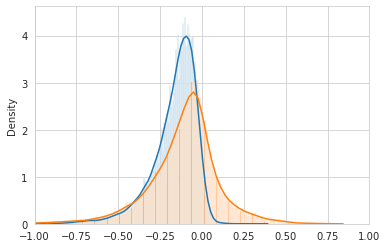

In [16]:
plt.figure()
sns.distplot(meltedPredDF_rand['pred score'].values,kde=True,hist=True,bins=800,norm_hist=True);
sns.distplot(meltedPredDF['pred score'].values,kde=True,hist=True,bins=800,norm_hist=True);
plt.xlim(-1,1)

In [10]:
from multiprocessing import Pool


dataset_rootDir='./';pertColName='PERT'
# dataset options: 'CDRP' , 'LUAD', 'TAORF', 'LINCS', 'CDRP-bio'
datasets=['LUAD', 'TAORF', 'LINCS', 'CDRP-bio'];
DT_kfold={'LUAD':10, 'TAORF':5, 'LINCS':20, 'CDRP-bio':20}
# CP Profile Type options: 'augmented' , 'normalized', 'normalized_variable_selected'
# 'normalized_feature_select_dmso'
profileType='normalized_variable_selected'
profileLevel='treatment'; #'replicate'  or  'treatment'
highRepOverlapEnabled=1


def f(dataset):
    
#     datasets=['LUAD', 'TAORF', 'LINCS', 'CDRP-bio'];
    DT_kfold={'LUAD':10, 'TAORF':5, 'LINCS':20, 'CDRP-bio':20}
    # CP Profile Type options: 'augmented' , 'normalized', 'normalized_variable_selected'
    # 'normalized_feature_select_dmso'
    profileType='normalized_variable_selected'
    profileLevel='treatment'; #'replicate'  or  'treatment'
    highRepOverlapEnabled=1    
    
    nRep=2
    if dataset=='LINCS':
        profileType='normalized_feature_select_dmso'
    else:
        profileType='normalized_variable_selected'        
#     highRepOverlapEnabled=1
    mergProf_repLevel,mergProf_treatLevel,cp_features,l1k_features=\
    readMergedProfiles(dataset_rootDir,dataset,profileType,profileLevel,nRep,highRepOverlapEnabled);
    # mergProf_repLevel,mergProf_treatLevel,l1k_features,cp_features,pertColName=readMergedProfiles(dataset,profileType,nRep)
    # cp_features,l1k_features=cp_features.tolist(),l1k_features.tolist()


    if profileLevel=='replicate':
        l1k=mergProf_repLevel[[pertColName]+l1k_features]
        cp=mergProf_repLevel[[pertColName]+cp_features]
    elif profileLevel=='treatment':
        l1k=mergProf_treatLevel[[pertColName]+l1k_features]
        cp=mergProf_treatLevel[[pertColName]+cp_features]


    scaler_ge = preprocessing.StandardScaler()
    scaler_cp = preprocessing.StandardScaler()
    l1k_scaled=l1k.copy()
    l1k_scaled[l1k_features] = scaler_ge.fit_transform(l1k[l1k_features].values)
    cp_scaled=cp.copy()
    cp_scaled[cp_features] = scaler_cp.fit_transform(cp[cp_features].values.astype('float64'))
    
    
    cp_scaled[cp_features] =preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit_transform(cp_scaled[cp_features].values)   
    l1k_scaled[l1k_features] =preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit_transform(l1k_scaled[l1k_features].values)       
    

    if 1:
        cp=cp_scaled.copy()
        l1k=l1k_scaled.copy()
        
    ##############################
    
    for model in ["Lasso","MLP"]:
        
        k_fold=DT_kfold[dataset]
        pred_df=pd.DataFrame(index=range(k_fold),columns=l1k_features)
        pred_df_rand=pd.DataFrame(index=range(k_fold),columns=l1k_features)
        for l in l1k_features:
            if model=="Lasso":
                scores,scores_rand=lasso_cv(cp[cp_features],l1k[l],k_fold)
            elif model=="MLP":
                scores,scores_rand=MLP_cv(cp[cp_features],l1k[l],k_fold)            
            pred_df[l]=scores
            pred_df_rand[l]=scores_rand

        ########################### mapping prob_ids to genes names    
        meta=pd.read_csv("/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/metadata/affy_probe_gene_mapping.txt",delimiter="\t",header=None, names=["probe_id", "gene"])
        meta_gene_probID=meta.set_index('probe_id')
        d = dict(zip(meta_gene_probID.index, meta_gene_probID['gene']))
        pred_df = pred_df.rename(columns=d)    
        pred_df_rand = pred_df_rand.rename(columns=d)  


        meltedPredDF=pd.melt(pred_df).rename(columns={'variable':'lmGens','value':'pred score'})
        meltedPredDF_rand=pd.melt(pred_df_rand).rename(columns={'variable':'lmGens','value':'pred score'})
        meltedPredDF['d']="n-folds"
        meltedPredDF_rand['d']="random"
        filename='../../results/SingleGenePred/scores.xlsx'
        saveAsNewSheetToExistingFile(filename,pd.concat([meltedPredDF,meltedPredDF_rand],ignore_index=True),\
                                     model+'-'+dataset+'-fSel-dists-filt')

    return 

with Pool(10) as p:
    p.map(f, datasets)

/home/ubuntu/anaconda3/lib/python3.8/multiprocessing/pool.py:125: DtypeWarning: Columns (1023,1028) have mixed types.Specify dtype option on import or set low_memory=False.
  result = (True, func(*args, **kwds))


TAORF: Replicate Level Shapes (nSamples x nFeatures): cp:  1920 , 63 ,  l1k:  729 , 978
l1k n of rep:  2.0
cp n of rep:  5.0
CP: from  324  to  218
l1k: from  327  to  78
CP and l1k high rep overlap:  36
Treatment Level Shapes (nSamples x nFeatures+metadata): (37, 65) (37, 980) Merged Profiles Shape: (37, 1044)


/home/ubuntu/anaconda3/lib/python3.8/multiprocessing/pool.py:125: DtypeWarning: Columns (981,982,983) have mixed types.Specify dtype option on import or set low_memory=False.
  result = (True, func(*args, **kwds))
/home/ubuntu/anaconda3/lib/python3.8/multiprocessing/pool.py:125: DtypeWarning: Columns (18,19,1249,1250) have mixed types.Specify dtype option on import or set low_memory=False.
  result = (True, func(*args, **kwds))


LUAD: Replicate Level Shapes (nSamples x nFeatures): cp:  6144 , 291 ,  l1k:  4232 , 978
l1k n of rep:  8.0
cp n of rep:  8.0
CP: from  593  to  364
l1k: from  529  to  275
CP and l1k high rep overlap:  197
Treatment Level Shapes (nSamples x nFeatures+metadata): (198, 294) (198, 979) Merged Profiles Shape: (198, 1272)
LINCS: Replicate Level Shapes (nSamples x nFeatures): cp:  52223 , 119 ,  l1k:  27837 , 978
l1k n of rep:  3.0
cp n of rep:  5.0
CP: from  9394  to  4647
l1k: from  8369  to  2338
CP and l1k high rep overlap:  1140
Treatment Level Shapes (nSamples x nFeatures+metadata): (1141, 122) (1141, 980) Merged Profiles Shape: (1141, 1101)
[<Worksheet "Lasso-TAORF">, <Worksheet "Lasso-LUAD">, <Worksheet "Lasso-LINCS">, <Worksheet "Lasso-CDRP">, <Worksheet "Lasso-random">, <Worksheet "Lasso-TAORF-all">, <Worksheet "Lasso-LUAD-all">, <Worksheet "Lasso-LINCS-all">, <Worksheet "Lasso-CDRP-all">, <Worksheet "Lasso-random-all">, <Worksheet "Lasso-TAORF-fSel">, <Worksheet "Lasso-LINCS-fSel

KeyError: 'cp-cdrp-bio'

### Single Gene prediction cross validation

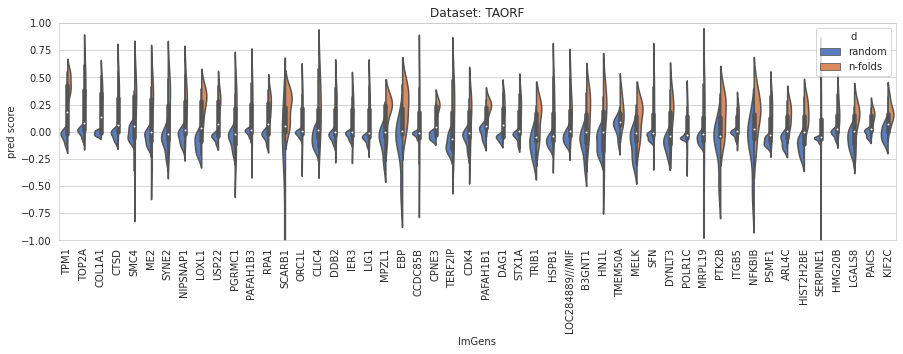

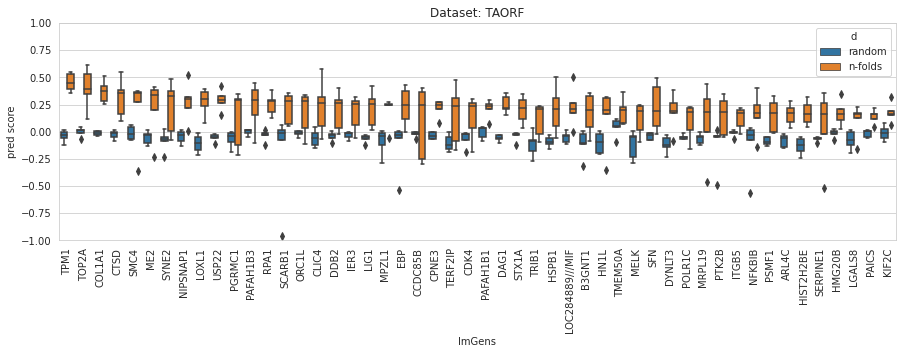

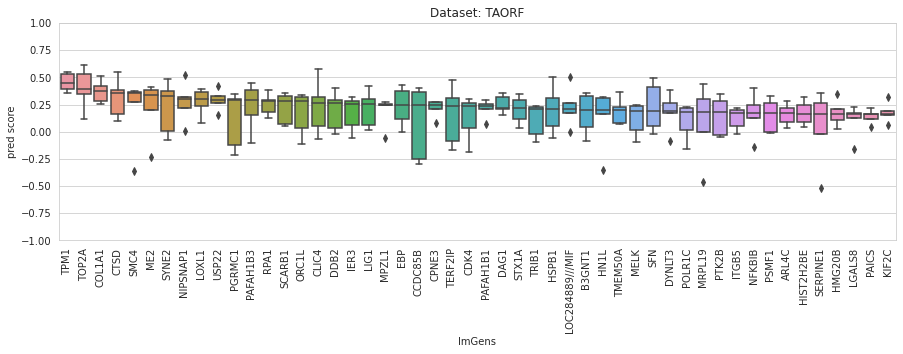

In [283]:
sns.set_style("whitegrid")
k_fold=5
pred_df=pd.DataFrame(index=range(k_fold),columns=l1k_features)
pred_df_rand=pd.DataFrame(index=range(k_fold),columns=l1k_features)
for l in l1k_features:
    scores,scores_rand=lasso_cv(cp[cp_features],l1k[l],k_fold)
    pred_df[l]=scores
    pred_df_rand[l]=scores_rand

########################### mapping prob_ids to genes names    
meta=pd.read_csv("/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/metadata/affy_probe_gene_mapping.txt",delimiter="\t",header=None, names=["probe_id", "gene"])
meta_gene_probID=meta.set_index('probe_id')
d = dict(zip(meta_gene_probID.index, meta_gene_probID['gene']))
pred_df = pred_df.rename(columns=d)    
pred_df_rand = pred_df_rand.rename(columns=d)  


meltedPredDF=pd.melt(pred_df).rename(columns={'variable':'lmGens','value':'pred score'})
meltedPredDF_rand=pd.melt(pred_df_rand).rename(columns={'variable':'lmGens','value':'pred score'})
meltedPredDF['d']="n-folds"
meltedPredDF_rand['d']="random"
filename='../../results/SingleGenePred/scores.xlsx'
saveAsNewSheetToExistingFile(filename,pd.concat([meltedPredDF,meltedPredDF_rand],ignore_index=True),\
                             'Lasso-'+dataset+'-fSel-dists')

########################### plot prediction scores sorted by the median across all folds scores
sorted_gene_mean_scores=pred_df.median().reset_index().sort_values(by=[0],ascending=False)
highPredDF=pd.melt(pred_df[sorted_gene_mean_scores[0:50]['index'].values.tolist()]).rename(columns={'variable':'lmGens','value':'pred score'})
highPredDF_rand=pd.melt(pred_df_rand[sorted_gene_mean_scores[0:50]['index'].values.tolist()]).rename(columns={'variable':'lmGens','value':'pred score'})

highPredDF['d']="n-folds"
highPredDF_rand['d']="random"
tips2_0 = pd.concat([highPredDF_rand,highPredDF],ignore_index=True).reset_index(drop=True)
tips2=pd.merge(meta_geneFamilyU,tips2_0,how='right',on=["lmGens"])
highPredDF=pd.merge(meta_geneFamilyU,highPredDF,how='right',on=["lmGens"])
tips2["d"]=tips2["d"].astype('category')
tips2["gene_group_name"]=tips2["gene_group_name"].astype('category')
tips2["lmGens"]=tips2["lmGens"].astype('category')
#####
f, axes = plt.subplots(figsize=(15,4))
axes.set_title("Dataset: "+dataset)
# sns.boxplot(x="lm Gens", y="pred score", data=highPredDF,ax=axes)
ax = sns.violinplot(x="lmGens", y="pred score", hue="d",data=tips2_0, palette="muted", split=True)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=10);
axes.set_ylim(-1, 1)
######
f, axes = plt.subplots(figsize=(15,4))
axes.set_title("Dataset: "+dataset)
sns.boxplot(x="lmGens", y="pred score",hue="d", data=tips2_0,ax=axes)
# ax = sns.violinplot(x="lmGens", y="pred score", hue="d",data=tips2, palette="muted", split=True)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=10);
axes.set_ylim(-1, 1)
#####
f, axes = plt.subplots(figsize=(15,4))
axes.set_title("Dataset: "+dataset)
sns.boxplot(x="lmGens", y="pred score", data=highPredDF,ax=axes)
# ax = sns.violinplot(x="lmGens", y="pred score", hue="d",data=tips2, palette="muted", split=True)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=10);
axes.set_ylim(-1, 1)
# ########################### evluation based on Correlation with protein abundance
# prot_gen_cor=pd.read_csv('/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/metadata/proteome-transcriptome-abundance/Table_EV2_corrs.csv',index_col='Unnamed: 0')
# # sorted_gene_mean_scores=pred_df.median().reset_index().sort_values(by=[0],ascending=False)
# common_genes=list(set(sorted_gene_mean_scores['index'].values) & set(prot_gen_cor.index))

# sorted_gene_mean_scores2=sorted_gene_mean_scores.set_index('index')
# pred_eval_df=pd.concat([prot_gen_cor.loc[common_genes,:], sorted_gene_mean_scores2.loc[common_genes,:]], axis=1)
# pred_eval_cc=scipy.stats.pearsonr(np.squeeze(pred_eval_df["corr1"].values), np.squeeze(pred_eval_df[0].values))[0]
# axes.set_title("Dataset: "+dataset+"  , eval metric: "+str(np.round(pred_eval_cc,3)));

########################## Save prediction score results
filename='../../results/SingleGenePred/scores.xlsx'
# saveAsNewSheetToExistingFile(filename,sorted_gene_mean_scores.rename(columns={'index':'lm_Gens',0:'pred_score'}),'Lasso-'+dataset)
saveAsNewSheetToExistingFile(filename,sorted_gene_mean_scores.rename(columns={'index':'lm_Gens',0:'pred_score'}),'Lasso-'+dataset+'-fSel')

In [268]:
highPredDF_rand

,lmGens,pred score,d
0,HERPUD1,-0.000832,random
1,HERPUD1,-0.006668,random
2,HERPUD1,-0.003482,random
3,HERPUD1,-0.000007,random
4,HERPUD1,-0.050075,random
...,...,...,...
995,SMAD3,-0.032224,random
996,SMAD3,-0.014336,random
997,SMAD3,-0.015864,random
998,SMAD3,-0.000307,random


In [105]:
# saveAsNewSheetToExistingFile(filename,sorted_gene_mean_scores.rename(columns={'index':'lm_Gens',0:'pred_score'}),'Lasso-'+dataset+'-fSel')
tips2.head()

,lmGens,gene_group_name,pred score,d
0,S100A4,"EF-hand domain containing, S100 calcium bindin...",-0.001987,random
1,S100A4,"EF-hand domain containing, S100 calcium bindin...",-0.004980,random
2,S100A4,"EF-hand domain containing, S100 calcium bindin...",-0.012413,random
3,S100A4,"EF-hand domain containing, S100 calcium bindin...",-0.002649,random
4,S100A4,"EF-hand domain containing, S100 calcium bindin...",-0.011193,random


(-1.0, 1.0)

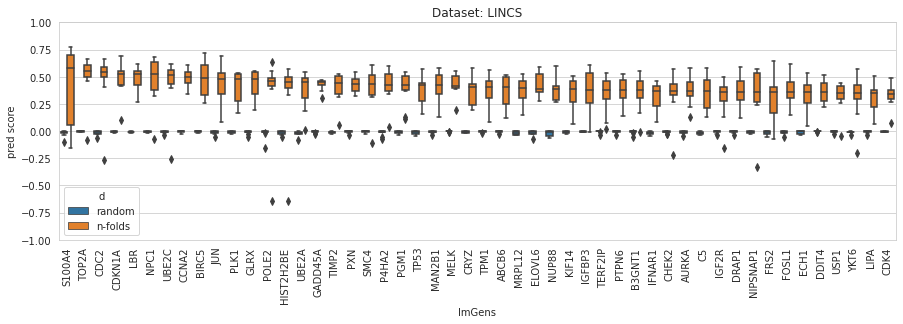

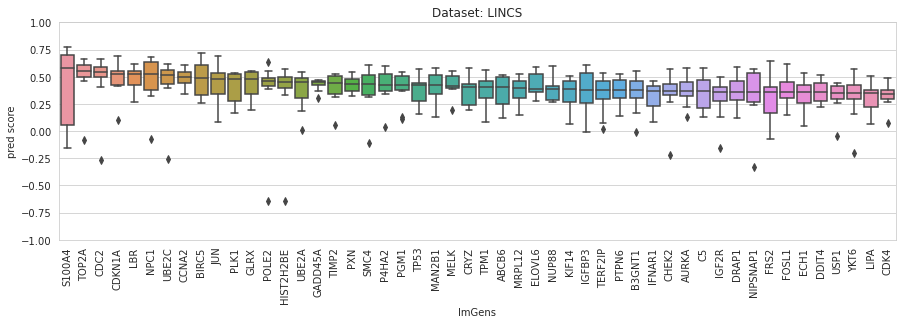

In [106]:
tips2 = pd.concat([highPredDF_rand,highPredDF],ignore_index=True).reset_index(drop=True)
######
f, axes = plt.subplots(figsize=(15,4))
axes.set_title("Dataset: "+dataset)
sns.boxplot(x="lmGens", y="pred score",hue="d", data=tips2,ax=axes)
# ax = sns.violinplot(x="lmGens", y="pred score", hue="d",data=tips2, palette="muted", split=True)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=10);
axes.set_ylim(-1, 1)
#####
f, axes = plt.subplots(figsize=(15,4))
axes.set_title("Dataset: "+dataset)
sns.boxplot(x="lmGens", y="pred score", data=highPredDF,ax=axes)
# ax = sns.violinplot(x="lmGens", y="pred score", hue="d",data=tips2, palette="muted", split=True)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=10);
axes.set_ylim(-1, 1)


(-1.0, 1.0)

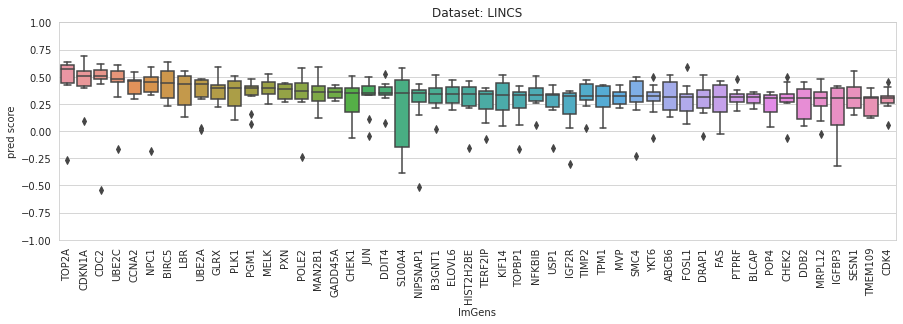

In [36]:
sns.set_style("whitegrid")
#####
f, axes = plt.subplots(figsize=(15,4))
axes.set_title("Dataset: "+dataset)
sns.boxplot(x="lmGens", y="pred score", data=highPredDF,ax=axes)
# ax = sns.violinplot(x="lmGens", y="pred score", hue="d",data=tips2, palette="muted", split=True)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=10);
axes.set_ylim(-1, 1)

(-1.0, 1.0)

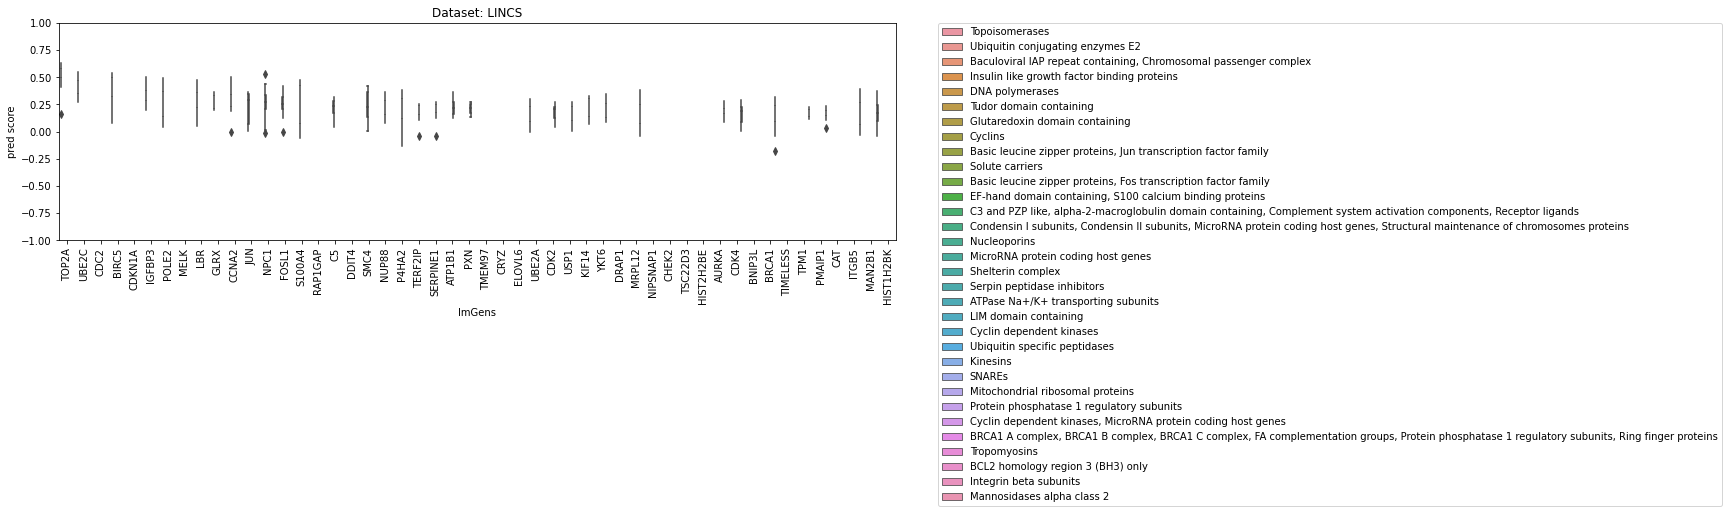

In [27]:
#####
f, axes = plt.subplots(figsize=(15,4))
axes.set_title("Dataset: "+dataset)
g=sns.boxplot(x="lmGens", y="pred score",hue="gene_group_name", data=highPredDF,ax=axes)
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
# ax = sns.violinplot(x="lmGens", y="pred score", hue="d",data=tips2, palette="muted", split=True)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=10);
# g._legend.remove()
# plt.legend([],[], frameon=False)
axes.set_ylim(-1, 1)

# highPredDF

In [237]:
# highPredDF.groupby(["gene_group_name"]).size()
# highPredDF[highPredDF["gene_group_name"].isnull()].shape
# highPredDF
pred_df_rand.median().reset_index().sort_values(by=[0],ascending=False)

,index,0
832,STAT1,0.041034
746,RPL39L,0.036666
528,MUC1,0.015865
686,PSMD4,0.013133
962,XPO7,0.013050
...,...,...
397,ICAM1,-0.184600
330,GFPT1,-0.190170
254,ECH1,-0.208072
150,CEP57,-0.217841


In [12]:
sorted_gene_mean_scores=pred_df_rand.median().reset_index().sort_values(by=[0],ascending=False)
filename='../../results/SingleGenePred/scores.xlsx'
saveAsNewSheetToExistingFile(filename,sorted_gene_mean_scores.rename(columns={'index':'lm_Gens',0:'pred_score'}),'Lasso-random-all')

In [9]:
# scipy.stats.pearsonr(np.squeeze(pred_eval_df["corr1"].values), np.squeeze(pred_eval_df[0].values))[0]
saved_scores=pd.read_excel('../../results/SingleGenePred/scores.xlsx', sheet_name=None)
# saved_scores_lasso=saved_scores['Lasso-'+dataset]
# saved_scores_lasso.head()

In [10]:
saved_scores.keys()
# saved_scores_lasso

dict_keys(['Lasso-TAORF', 'Lasso-LUAD', 'Lasso-LINCS', 'Lasso-CDRP', 'Lasso-random', 'Lasso-TAORF-all', 'Lasso-LUAD-all', 'Lasso-LINCS-all', 'Lasso-CDRP-all', 'Lasso-random-all', 'Lasso-TAORF-fSel', 'Lasso-LINCS-fSel', 'Lasso-CDRP-bio-fSel', 'Lasso-CDRP-bio-fSel-dists', 'Lasso-TAORF-fSel-dists', 'Lasso-LUAD-fSel-dists', 'MLP-LUAD-fSel-dists', 'MLP-TAORF-fSel-dists', 'MLP-CDRP-bio-fSel-dists'])

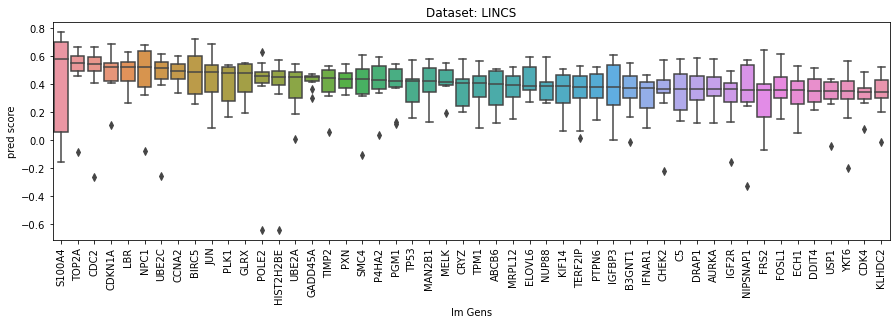

In [114]:
sorted_gene_mean_scores=pred_df.median().reset_index().sort_values(by=[0],ascending=False)
highPredDF=pd.melt(pred_df[sorted_gene_mean_scores[0:50]['index'].values.tolist()]).rename(columns={'variable':'lm Gens','value':'pred score'})

f, axes = plt.subplots(figsize=(15,4))
axes.set_title("Dataset: "+dataset)
sns.boxplot(x="lm Gens", y="pred score", data=highPredDF,ax=axes)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=10);

### Correlation with protein abundance

In [47]:
# sorted_gene_mean_scores2
l1k[l].sample(frac = 1) 

96    -0.584397
132    0.400269
54     0.005120
161   -0.164447
26    -1.069135
         ...   
139    0.335050
91    -0.589123
206   -0.042516
17     0.277244
202   -0.053090
Name: 204812_at, Length: 213, dtype: float64

In [102]:
# highPredDF

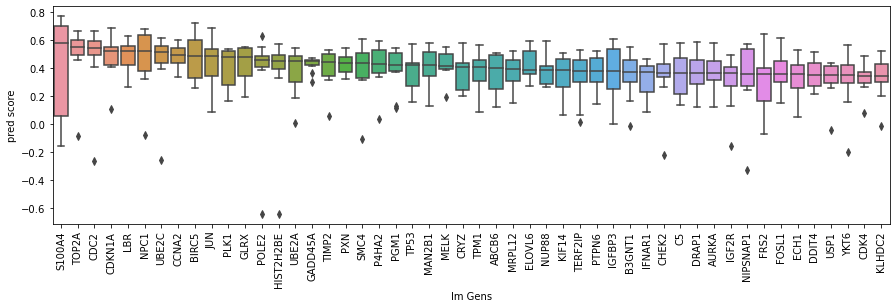

In [113]:
f, axes = plt.subplots(figsize=(15,4))

# for d in range(len(doses)):
#     sns.boxplot(x="Metadata_moa", y="fVal", hue="fName", \
#                 data=df_grouped_bxplt[df_grouped_bxplt['Metadata_mg_per_ml_rounded']==doses[d]].reset_index(drop=True), palette="Set1",ax=axes[d])
#     axes[d].set_title("Dose: "+str(doses[d]))
#     axes[d].set_xticklabels(axes[d].get_xticklabels(),rotation=90,fontsize=10);
#     axes[d].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=10)
sns.boxplot(x="lm Gens", y="pred score", data=highPredDF,ax=axes)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=10);

In [54]:
scores

array([0.38638464, 0.27816457, 0.39661721, 0.27745571, 0.26364289,
       0.14565819, 0.27624536, 0.19623219, 0.30090798, 0.15817473])

In [32]:
np.any(np.isnan(cp[cp_features[0:100]].values))

True

In [42]:
np.any(np.isnan(cp[cp_features].values))

True

In [37]:
cp.interpolate(method="linear", inplace=True)

In [22]:
cp=mergProf_treatLevel.copy()
cols2removeCP=[i for i in cp_features if (cp[i].isnull().sum(axis=0)/cp.shape[0])>0.05]
print(cols2removeCP)
cp=cp.drop(cols2removeCP, axis=1);
cp_features2 = list(set(cp_features) - set(cols2removeCP))
cp[cp_features2]=cp[cp_features2].interpolate()
cols2removeCP=[i for i in cp_features2 if cp[i].isnull().sum(axis=0)>0]
print(cols2removeCP)

[]
[]


In [10]:
mergProf_treatLevel.drop_duplicates(subset=None, keep="first", inplace=False).shape
# mergProf_treatLevel

(1141, 2726)

### Single CP feature prediction cross validation

In [ ]:
k_fold=20
pred_df=pd.DataFrame(index=range(k_fold),columns=cp_features)
for c in cp_features:
    scores=lasso_cv(l1k[l1k_features],cp[c],k_fold)
    pred_df[c]=scores

# ########################### mapping prob_ids to genes names    
# meta=pd.read_csv("/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/metadata/affy_probe_gene_mapping.txt",delimiter="\t",header=None, names=["probe_id", "gene"])
# meta_gene_probID=meta.set_index('probe_id')
# d = dict(zip(meta_gene_probID.index, meta_gene_probID['gene']))
# pred_df = pred_df.rename(columns=d)    
    
########################### plot prediction scores sorted by the median across all folds scores
sorted_gene_mean_scores=pred_df.median().reset_index().sort_values(by=[0],ascending=False)
highPredDF=pd.melt(pred_df[sorted_gene_mean_scores[0:80]['index'].values.tolist()]).rename(columns={'variable':'CP feats','value':'pred score'})

f, axes = plt.subplots(figsize=(15,4))
axes.set_title("Dataset: "+dataset)
sns.boxplot(x="CP feats", y="pred score", data=highPredDF,ax=axes)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=10);
axes.set_ylim(0, 1)


# ########################### evluation based on Correlation with protein abundance
# prot_gen_cor=pd.read_csv('/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/metadata/proteome-transcriptome-abundance/Table_EV2_corrs.csv',index_col='Unnamed: 0')
# # sorted_gene_mean_scores=pred_df.median().reset_index().sort_values(by=[0],ascending=False)
# common_genes=list(set(sorted_gene_mean_scores['index'].values) & set(prot_gen_cor.index))

# sorted_gene_mean_scores2=sorted_gene_mean_scores.set_index('index')
# pred_eval_df=pd.concat([prot_gen_cor.loc[common_genes,:], sorted_gene_mean_scores2.loc[common_genes,:]], axis=1)
# pred_eval_cc=scipy.stats.pearsonr(np.squeeze(pred_eval_df["corr1"].values), np.squeeze(pred_eval_df[0].values))[0]
# axes.set_title("Dataset: "+dataset+"  , eval metric: "+str(np.round(pred_eval_cc,3)));

########################## Save prediction score results
filename='../../results/SingleCPfeatPred/scores.xlsx'
saveAsNewSheetToExistingFile(filename,sorted_gene_mean_scores.rename(columns={'index':'CP feats',0:'pred_score'}),'Lasso-'+dataset)

In [26]:
dataset

'LINCS'

In [27]:
saved_scores=pd.read_excel('../../results/SingleCPfeatPred/scores.xlsx', sheet_name=None)
saved_scores_lasso=saved_scores['Lasso-'+dataset]
saved_scores_lasso.head()

,Unnamed: 0,CP feats,pred_score
0,138,Cytoplasm_Granularity_16_AGP,0.740094
1,580,Cells_Granularity_12_AGP,0.736100
2,1541,Cytoplasm_Granularity_15_Mito,0.733307
3,486,Cells_Granularity_14_AGP,0.728269
4,108,Nuclei_Texture_InverseDifferenceMoment_DNA_10_0,0.727391


In [28]:
# Potentail visually interpretable features 
v_i_f_list=["Cells_AreaShape_Eccentricity",
    "Nuclei_AreaShape_Area", "Cytoplasm_AreaShape_Area", "Cells_AreaShape_Area",
    "Cells_RadialDistribution_MeanFrac_Mito_4of4",
    "Cells_Intensity_MassDisplacement_AGP",
    "Nuclei_Granularity_1_DNA",
    "Cells_Intensity_MeanIntensityEdge_AGP"]

In [37]:
v_i_f_list2=["Nuclei_AreaShape_Eccentricity",
    "Nuclei_AreaShape_Area", "Cytoplasm_AreaShape_Area", "Cells_AreaShape_Area",
    "Cells_RadialDistribution_MeanFrac_Mito_4of4",
    "Nuclei_Intensity_MassDisplacement_DNA",
    "Cells_Granularity_1_AGP",
    "Cells_Intensity_MeanIntensityEdge_AGP"]

In [38]:
saved_scores_lasso[saved_scores_lasso["CP feats"].isin(v_i_f_list2)]

,Unnamed: 0,CP feats,pred_score
17,309,Cells_Granularity_1_AGP,0.708425
86,1496,Nuclei_AreaShape_Area,0.665405
200,1253,Cells_RadialDistribution_MeanFrac_Mito_4of4,0.598590
220,149,Nuclei_Intensity_MassDisplacement_DNA,0.591571
321,118,Cells_AreaShape_Area,0.556702
338,403,Cytoplasm_AreaShape_Area,0.552584
549,1348,Nuclei_AreaShape_Eccentricity,0.477723
827,1616,Cells_Intensity_MeanIntensityEdge_AGP,0.401995


In [36]:
saved_scores_lasso[saved_scores_lasso["CP feats"].isin(['Nuclei_Intensity_MassDisplacement_AGP',
       'Nuclei_Intensity_MassDisplacement_ER',
       'Cytoplasm_Intensity_MassDisplacement_DNA',
       'Nuclei_Intensity_MassDisplacement_DNA',
       'Cells_Intensity_MassDisplacement_AGP',
       'Cytoplasm_Intensity_MassDisplacement_Mito',
       'Nuclei_Intensity_MassDisplacement_Mito',
       'Nuclei_Intensity_MassDisplacement_RNA',
       'Cytoplasm_Intensity_MassDisplacement_ER',
       'Cells_Intensity_MassDisplacement_DNA',
       'Cells_Intensity_MassDisplacement_ER',
       'Cytoplasm_Intensity_MassDisplacement_RNA',
       'Cytoplasm_Intensity_MassDisplacement_AGP',
       'Cells_Intensity_MassDisplacement_RNA',
       'Cells_Intensity_MassDisplacement_Mito'])]

,Unnamed: 0,CP feats,pred_score
220,149,Nuclei_Intensity_MassDisplacement_DNA,0.591571
332,205,Cytoplasm_Intensity_MassDisplacement_Mito,0.553412
467,1522,Cytoplasm_Intensity_MassDisplacement_AGP,0.507992
537,279,Cells_Intensity_MassDisplacement_Mito,0.482051
696,1628,Nuclei_Intensity_MassDisplacement_Mito,0.437292
898,808,Cells_Intensity_MassDisplacement_AGP,0.382221
1061,909,Nuclei_Intensity_MassDisplacement_RNA,0.333328
1071,232,Cytoplasm_Intensity_MassDisplacement_ER,0.330362
1124,882,Cells_Intensity_MassDisplacement_ER,0.314702
1144,1526,Cells_Intensity_MassDisplacement_RNA,0.306929


### CP Category specific scores for single gene prediction

In [72]:
# relationMat_mpCat.isnull(axis=1)
# Channelss=['DNA','RNA','AGP','Mito','ER']
# featureGroups=['Texture','Intensity','RadialDistribution']
# cp.columns[cp.columns.str.contains(Channelss[0]) &\
#                cp.columns.str.contains(featureGroups[2]) &\
#                cp.columns.str.contains("Cells_|Cytoplasm_|Nuclei_")].tolist()

In [74]:
relationMat_mpCat.columns[~relationMat_mpCat.isna().any()].tolist()

['DNA_Texture',
 'DNA_Intensity',
 'RNA_Texture',
 'RNA_Intensity',
 'RNA_RadialDistribution',
 'AGP_Texture',
 'AGP_Intensity',
 'AGP_RadialDistribution',
 'Mito_Texture',
 'Mito_Intensity',
 'Mito_RadialDistribution',
 'ER_Texture',
 'ER_Intensity',
 'ER_RadialDistribution',
 'Nuclei_AreaShape',
 'Cytoplasm_AreaShape',
 'Cells_AreaShape']

In [110]:
k_fold=10
Channelss=['DNA','RNA','AGP','Mito','ER']
featureGroups=['Texture','Intensity','RadialDistribution']
relationMat_mpCat=pd.DataFrame(index=l1k_features)
for ch in range(len(Channelss)):
    for f in range(len(featureGroups)):    
        selectedCols=cp.columns[cp.columns.str.contains(Channelss[ch]) &\
                       cp.columns.str.contains(featureGroups[f]) &\
                       cp.columns.str.contains("Cells_|Cytoplasm_|Nuclei_")].tolist();
        for l in l1k_features:
            scores,scores_rand=lasso_cv(cp[selectedCols],l1k[l],k_fold)
        
            relationMat_mpCat.loc[l,Channelss[ch]+'_'+featureGroups[f]]=np.median(scores)

Channelss=['Nuclei','Cytoplasm','Cells']
featureGroups=['AreaShape']

for ch in range(len(Channelss)):
    for f in range(len(featureGroups)):    
        selectedCols=cp.columns[cp.columns.str.contains(Channelss[ch]) &\
                       cp.columns.str.contains(featureGroups[f]) &\
                       cp.columns.str.contains("Cells_|Cytoplasm_|Nuclei_")].tolist();
        for l in l1k_features:
            scores,scores_rand=lasso_cv(cp[selectedCols],l1k[l],k_fold)
        
            relationMat_mpCat.loc[l,Channelss[ch]+'_'+featureGroups[f]]=np.median(scores)
            
########################### mapping prob_ids to genes names    
meta=pd.read_csv("/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/metadata/affy_probe_gene_mapping.txt",delimiter="\t",header=None, names=["probe_id", "gene"])
meta_gene_probID=meta.set_index('probe_id')
d = dict(zip(meta_gene_probID.index, meta_gene_probID['gene']))
relationMat_mpCat = relationMat_mpCat.rename(index=d)    


In [111]:
relationMat_mpCat=relationMat_mpCat[relationMat_mpCat.columns[~relationMat_mpCat.isna().any()].tolist()]
topGenes_df=relationMat_mpCat[relationMat_mpCat.max(axis=1)>0.1]#.head()
topGenes_df2=relationMat_mpCat[relationMat_mpCat.max(axis=1)>0.5]#.head()
topGenes_df2.shape

(91, 18)

In [196]:
topGenes_mito_radial=relationMat_mpCat[relationMat_mpCat["Mito_RadialDistribution"].abs()>0.6]

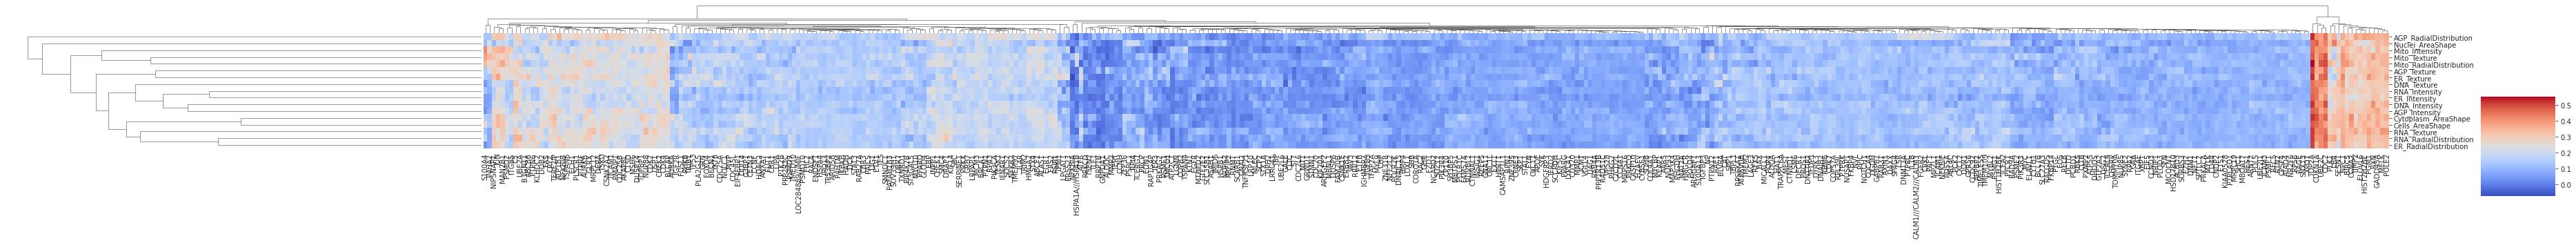

In [87]:
# plt.figure()
# f, axes = plt.subplots(figsize=(15,4))
# ax = sns.heatmap(topGenes_df)
clustergrid=sns.clustermap(topGenes_df.T,xticklabels=1,yticklabels=1,figsize=(50, 5),cmap="coolwarm",cbar_pos=(1, 0.2, .03, .4))


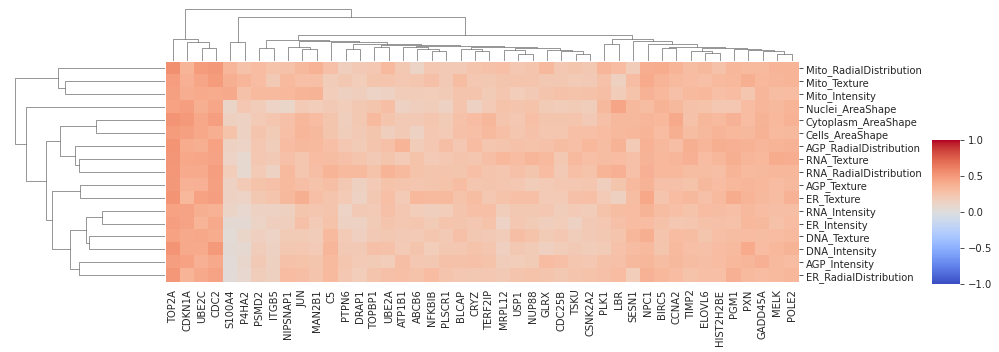

In [79]:
# clustergrid=sns.clustermap(topGenes_df2.T,xticklabels=1,yticklabels=1,figsize=(10, 5),cmap="vlag",\
#                            vmin=-1, vmax=1,cbar_pos=(1, 0.2, .03, .4))
%matplotlib inline
clustergrid=sns.clustermap(topGenes_df2.T,xticklabels=1,yticklabels=1,figsize=(13, 5),cmap="vlag",\
                           vmin=-1, vmax=1,cbar_pos=(1, 0.2, .03, .4))
clustergrid.savefig('../../results/cpCategoriesHM-'+dataset+'.png', format='png',dpi=100)

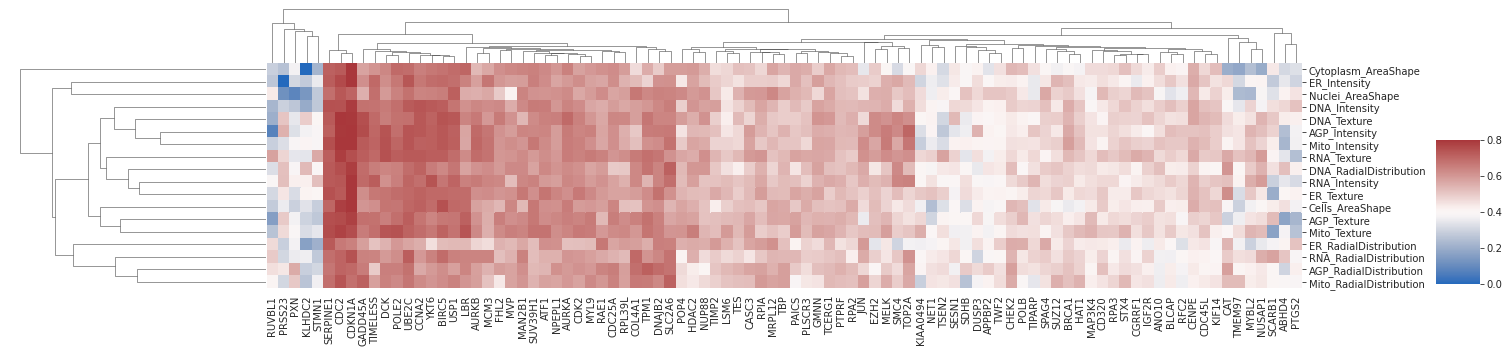

In [116]:
%matplotlib inline
clustergrid=sns.clustermap(topGenes_df2.T,xticklabels=1,yticklabels=1,figsize=(20, 5),cmap="vlag",\
                           vmin=0, vmax=0.8,cbar_pos=(1, 0.2, .03, .4))
# clustergrid.savefig('../../results/cpCategoriesHM-'+dataset+'.png', format='png',dpi=100)

In [ ]:
# Replicate correlations in different channels
Channelss=['DNA','Protein','Mito','ER']
featureGroups=['Texture','Intensity','RadialDistribution']
# Channelss=['DNA']
# featureGroups=['Texture','Intensity']
fig, axes = plt.subplots(4,3,sharey='row', figsize=(8,10))
for ch in range(len(Channelss)):
    for f in range(len(featureGroups)):    
        colss=df_meanPrepCorr.columns[df_meanPrepCorr.columns.str.contains(Channelss[ch]) &\
                                   df_meanPrepCorr.columns.str.contains(featureGroups[f]) &\
                          df_meanPrepCorr.columns.str.contains("Cells_|Cytoplasm_|Nuclei_")].tolist();
#         print(colss)
        repCC,randCC=utils.meanProfileAnalysis.categoricalRepCor(df_meanPrepCorr,'Metadata_Sample',colss,0);
#         sns.kdeplot(repCC, bw=.1,ax=axes[ch,f]);
#         sns.kdeplot(randCC, bw=.1,ax=axes[ch,f]);
        sns.distplot(randCC,kde=True,hist=True,bins=12,label="random pairs",ax=axes[ch,f],norm_hist=True);
    #         sns.kdeplot(randCC, bw=.2, label="random pairs",ax=axes[i])
        sns.distplot(repCC,kde=True,hist=True,bins=12,label="replicate pairs",ax=axes[ch,f],norm_hist=True);        
        
        
#         perc5=np.percentile(repCC, 15);axes[i,j].axvline(x=0,linestyle=':');        
        axes[ch,f].set_title(featureGroups[f]);
#         axes[i,j].get_yaxis().set_visible(False)
#         axes[i,j].get_xaxis().set_visible(False)
        axes[ch,0].set_ylabel(Channelss[ch]);



In [ ]:
Channelss=['Nuclei','Cytoplasm','Cells']
featureGroups=['AreaShape']
# Channelss=['DNA']
# featureGroups=['Texture','Intensity']
fig, axes = plt.subplots(1,3,sharey='row', figsize=(8,3))
for ch in range(len(Channelss)):
    for f in range(len(featureGroups)):    
        colss=df_meanPrepCorr.columns[df_meanPrepCorr.columns.str.contains(Channelss[ch]) &\
                                   df_meanPrepCorr.columns.str.contains(featureGroups[f]) &\
                          df_meanPrepCorr.columns.str.contains("Cells_|Cytoplasm_|Nuclei_")].tolist();
#         print(colss)
        repCC,randCC=utils.meanProfileAnalysis.categoricalRepCor(df_meanPrepCorr,'Metadata_Sample',colss,0);

        sns.distplot(randCC,kde=True,hist=True,bins=12,label="random pairs",ax=axes[ch],norm_hist=True);
    #         sns.kdeplot(randCC, bw=.2, label="random pairs",ax=axes[i])
        sns.distplot(repCC,kde=True,hist=True,bins=12,label="replicate pairs",ax=axes[ch],norm_hist=True);                
        
#         perc5=np.percentile(repCC, 15);axes[i,j].axvline(x=0,linestyle=':');        
        axes[ch].set_title(Channelss[ch]);

        axes[0].set_ylabel(featureGroups[f]);


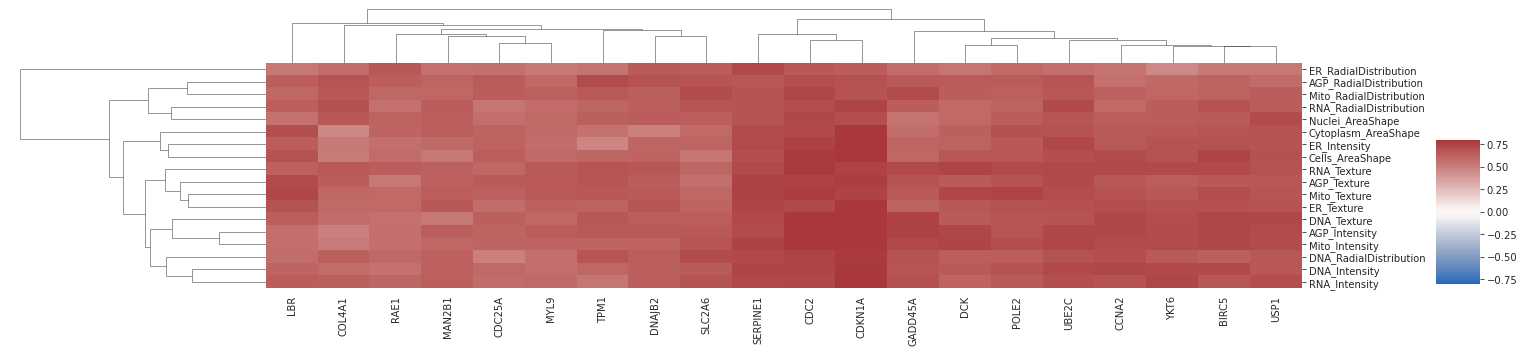

In [212]:
topGenes_mito_radial=relationMat_mpCat[relationMat_mpCat["Mito_RadialDistribution"]>0.6]#[["Mito_RadialDistribution"]]
clustergrid=sns.clustermap(topGenes_mito_radial.T,xticklabels=1,yticklabels=1,figsize=(20, 5),cmap="vlag",\
                           vmin=-0.8, vmax=0.8,cbar_pos=(1, 0.2, .03, .4))

In [215]:
topGenes_mito_radial.sort_values(by='Mito_RadialDistribution').index.values

array(['RAE1', 'MAN2B1', 'YKT6', 'LBR', 'BIRC5', 'CCNA2', 'POLE2', 'MYL9',
       'DNAJB2', 'USP1', 'CDC25A', 'DCK', 'TPM1', 'COL4A1', 'UBE2C',
       'CDKN1A', 'SERPINE1', 'SLC2A6', 'GADD45A', 'CDC2'], dtype=object)

In [208]:
topGenes_mito_radial

,Mito_RadialDistribution
BIRC5,0.623756
CCNA2,0.625290
CDC25A,0.645913
CDC2,0.737524
CDKN1A,0.682677
COL4A1,0.664509
DCK,0.649459
DNAJB2,0.633632
GADD45A,0.714480
LBR,0.606177


In [ ]:
BIRC5
CCNA2
CDC25A
CDC2
CDKN1A
COL4A1
DCK
DNAJB2
GADD45A
LBR
MAN2B1
MYL9
NFE2L2
POLE2
RAE1
S100A4
SERPINE1
SLC2A6
TPM1
UBE2C
USP1
YKT6

### 
# checked the above list in 
# http://cbdm-01.zdv.uni-mainz.de/~jfontain/cms/?page_id=592
# and didnt find any diseases related to psychitric diseases